# Contents <a id='back'></a>

* [Introduction](#intro)
* [1. Data Overview](#data_review)
    * [Conclusions](#data_review_conclusions)
* [2. Data Pre-Processing](#data_preprocessing)
    * [2.1 Standardize Column Names](#column_names)
    * [2.2 Working with Missing Values](#missing_values)
    * [2.3 Fixing Data Types](#data_types)
    * [2.4 Adding new columns](#new_column)
* [3. Exploratory Data Analysis](#eda)
    * [3.1 How many games were released in different years? Is the data significant for each period?](#full_released_year)
    * [3.2 How does sales vary from one platform to another?](#full_platform)
    * [3.3 Find platforms that were once popular but now have no sales at all. How long does it usually take for a new platform to emerge and for an old platform to fade in popularity?](#full_popular_platform)
    * [3.4 Which platforms have the highest sales? Which platforms are growing or shrinking? Are the sales differences significant? What about the average sales on various platforms?](#reference_platform)
    * [3.5 How does sales vary from one platform to another?](#reference_sales)
    * [3.6 Examine how user and professional reviews influence sales on the most popular platform (PS 4 - based on my analysis in point 3.5)?](#reference_review_ps4)
    * [3.7 Distribution of User and Professional Reviews and whether reviews influence sales on the second popular platform (PS3), and a comparison between the first popular platform (PS4) and the second popular platform (PS3)?](#reference_ps3_ps4)
    * [3.8 Observe the overall distribution of games based on genre. What can we conclude about the most profitable genres? Can you make generalizations about genres with high and low sales?](#reference_genre)
    * [3.9 User Profiling by Region](#reference_profiling)
* [4. Hypotheses Testing](#hypotheses)
     * [4.1 Hypothesis 1: The mean user rating for the Xbox One and PC platforms is the same](#mean_rating)
     * [4.2 Hypothesis 2: The mean user rating for the Action and Sports genres is not the same.](#mean_genre)
* [General Conclusion](#end)

# Introduction <a id='intro'></a>

In this project, I will identify patterns that determine whether a game can be considered successful or not. By doing so, you can discover the most promising games and plan advertising campaigns. Data related to user and expert reviews, genres, platforms (such as Xbox or PlayStation), and historical game sales data is available from open sources. The data is from the year 2016. Let's assume that it's now December 2016, and I am planning a campaign for the year 2017.

Objective:

To perform user profiling for each region, in order to understand the platforms and genres with the highest sales and potential profitability. Additionally, to analyze how user and expert reviews influence sales on one of the popular platforms.

Hyphoteses:
1. The mean user rating for the Xbox One and PC platforms is the same.
2. The mean user rating for the Action and Sports genres is not the same. 


This project will comprise the following steps:

1. Data Overview
2. Data Preprocessing
3. Exploratory Data Analysis
4. Hypotheses Testing

[Back to Contents](#back)

## 1. Data Overview <a id='data_review'></a>

[Back to Contents](#back)

In [55]:
# load the library
# dataset
import pandas as pd, numpy as np
import re

# statistical testing
import scipy.stats as st
from math import factorial

# data viz
import matplotlib.pyplot as plt, seaborn as sns

# ignore warning
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [4]:
# load dataset
dataset = 'data/games.csv'
df = pd.read_csv(dataset)

### 1.1 Data Exploration: games dataset

In this step, I will check the data as follows:
1. Checking the number of rows and columns.
2. Checking for missing values.
3. Checking for duplicated data.
4. Checking statistical information on columns with numerical data types.
5. Checking values in columns with categorical data types.

In [5]:
df.shape

(16715, 11)

In [6]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [10]:
df.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [11]:
# checking unique values in categorical columns
categorical_column = ['Name','Platform','Genre', 'User_Score', 'Rating']
for column in categorical_column:
    print(column)
    print((df[column].unique()))
    print()

Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

User_Score
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.

In [12]:
# checking unique values in numerical columns
numerical_column = ['Year_of_Release','NA_sales','EU_sales', 'JP_sales', 'Critic_Score']
for column in numerical_column:
    print(column)
    print((df[column].unique()))
    print()

Year_of_Release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

NA_sales
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+00 3.430e+00 5.510e+00
 6.850e+00 9.040e+00 5.890e+00 6.030e+00 9.700e+00 5.280e+00 4.990e+00
 8.250e+00 8.520e+00 5.540e+00 6.990e+00 6.620e+00 5.030e+00 5.990e+00
 3.960e+00 2.500e+00 7.970e+00 6.910e+00 4.340e+00 4.350e+00 3.010e+00
 6.160e+00 6.760e+00 4.020e+00 4.890e+00 2.960e+00 4.760e+00 5.010e+00
 6.730e+00 5.950e+00 3.660e+00 5.550e+00 7.040e+00 6.650e+00 3.880e+00
 5.800e+00 4.100e+00 5.930e+00 4.360e+00 5.700e+00 2.030e+00 4.400e+00
 5.050e+00 3.540e+00 1.120e+00 

In [13]:
# check duplicated data
df.duplicated().sum()

0

In [14]:
print((df['Name'].unique()))

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


In [15]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

**Conclusions and Steps to be Taken from the Data Exploration Process** <a id='data_review_conclusions'></a>

1. Column names are not consistently formatted. Column names will be converted to lowercase.
2. There are missing values in the following columns:
   - Name
   - Year of Release
   - Genre
   - Critic Score
   - User Score
   - Rating
   Handling of missing values will be further analyzed in the next steps.
3. Incorrect data types are found in the following columns:
   - Year of Release. Current: float > should be integer
   - Critic Score. Current: object > should be float
4. In the User_Score column, the value 'tbd' is present and needs to be addressed.
5. No duplicated data was found.

[Back to Contents](#back)

## 2 Data Preprocessing <a id='data_preprocessing'></a>

[Back to Contents](#back)

### 2.1 Standardize Column Names <a id='column_names'></a>

By changing the column names to lowercase for standardizing the column name format.

In [16]:
df.columns= df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Working with Missing Values <a id='missing_values'></a>

In [17]:
# checking the percentage
(df.isna().sum() / len(df))*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

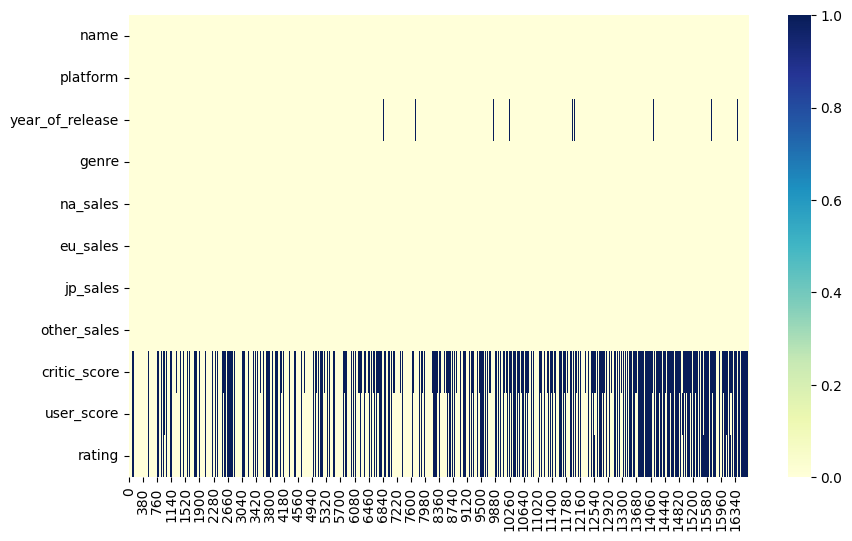

In [18]:
# Visualizing Missing Data using a seaborn heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu")
plt.show()

**Findings**

1. The percentage of missing values in the name and genre columns is 0.01%. The missing values in these columns follow the same pattern.
2. The percentage of missing values in the year of release column is 1.6%. The missing values in this column do not follow a specific pattern.
3. The percentage of missing values in the critic score, user score, and rating columns are 51.3%, 40.08%, and 40.47% respectively. The missing values in these three columns form a pattern where if either the critic score or the user score is missing, the rating is also missing. This could be due to the absence of user or expert scores for those games, resulting in a missing rating.

**Handling Missing Values**

1. Missing values in the name column will be dropped due to their very small percentage, which would not significantly impact the analysis results. This process will also remove missing values from the genre column.
2. In the year of release column, missing values will be filled with the value 0.
3. No filling of missing values will be performed in the critic score, user score, and rating columns due to their high percentage and the potential diversity of values. Imputing missing values in these columns could potentially alter the interpretation of the data.

In [19]:
# drop missing values in name and genre columns
df_clean = df[df['name'].notnull()].reset_index(drop=True)
df_clean.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [20]:
# fill with 0 in year of release column
df_clean['year_of_release'] = df_clean['year_of_release'].fillna(0)
df_clean.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [21]:
# fill with nan for 'tbd' value
df_clean['user_score'] = df_clean['user_score'].replace('tbd', np.nan)
df_clean.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

### 2.3 Fixing Data Types <a id='data_types'></a>

1. Changing the data type of year_of_release to integer.
2. Changing the data type of critic_score to float.

In [22]:
# fix data type of year_of_release to int
df_clean['year_of_release'] = df_clean['year_of_release'].astype('int')
df_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [23]:
# fix data type of user_score to float
df_clean['user_score'] = df_clean['user_score'].astype('float')
df_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [24]:
# verify the data type
df_clean.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### 2.4 Adding new column for analysing data <a id='new_column'></a>

Adding 'total_sales' column to calculate total sales

In [25]:
df_clean['total_sales'] = df_clean[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## 3 Exploratory Data Analysis <a id='eda'></a>

[Back to Contents](#back)

I will compare the result of two datasets, full dataset and reference dataset. Reference dataset is the data with Year of Release from 2013 to 2016.

**The things that will be analyzed in full dataset are:**

3.1. How many games were released in different years? Is the data significant for each period?

3.2. How does sales vary from one platform to another? Choose the platform with the highest total sales and create its distribution based on yearly data!

3.3. Find platforms that were once popular but now have no sales at all. How long does it usually take for a new platform to emerge and for an old platform to fade in popularity?


**The things that will be analyzed in reference dataset are:**

3.4. Which platforms have the highest sales? Which platforms are growing or shrinking? Select several platforms that have potential for profitability. Are the sales differences significant? What about the average sales on various platforms?

3.5. How does sales vary from one platform to another? Choose the platform with the highest total sales and create its distribution based on yearly data.

3.6. Examine how user and professional reviews influence sales on the most popular platform (PS 4 - based on my analysis in point 3.5)

3.7. Distribution of User and Professional Reviews and whether reviews influence sales on the second popular platform (PS3). Additionally, the comparison between the most popular platform (PS4) and the second popular platform (PS3).

3.8. Observe the overall distribution of games based on genre. What can we conclude about the most profitable genres? Can you make generalizations about genres with high and low sales?

3.9 User Profiling by Region

The scope of analysis in user profiling is as follows:
3.9.1. Top 5 platforms in the NA, EU, and JP regions, and explain the variations in market share from one region to another.
3.9.2. Top genres in the NA, EU, and JP regions, and describe the differences in market share.
3.9.3. Does the ESRB rating influence sales in each region?

### 3.1 (full dataset) How many games were released in different years? is the significant for each period? <a id='full_released_year'></a>

In [26]:
# data aggregation of the number of released games for each year
agg_year = pd.pivot_table(df_clean, index='year_of_release', values = 'name', aggfunc = 'count').reset_index()
agg_year.head()

,year_of_release,name
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17


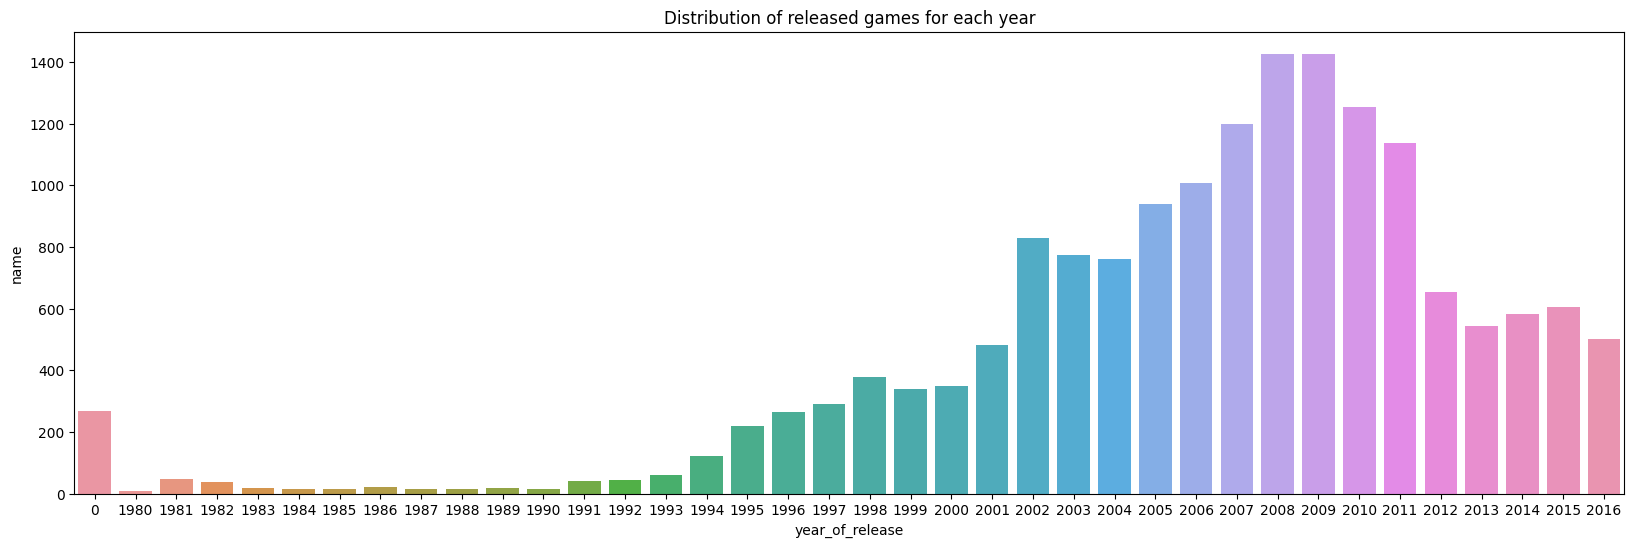

In [27]:
# visualizing the data
plt.figure(figsize=(20,6))
plt.title('Distribution of released games for each year')
sns.barplot(data=agg_year, x='year_of_release', y='name')
plt.show()

**Findings**
1. Game sales in the year range 1980 - 1991 show a bullish trend.
2. Game sales demonstrate an upward trend in the year range 1992 - 2008.
3. Game sales show a declining trend in the year range 2010 - 2013.
4. Game sales in the years 2014 - 2016 turn bullish again.
5. Sales exhibit a significant increase from 2001 to 2002. In 2001, the number of released games was around 400, but in 2002, game sales doubled with a value of around 800.
6. The peak of sales is observed in the years 2008 and 2009.

### 3.2 (full dataset) How does sales vary from one platform to another? <a id='full_platform'></a>

In [28]:
# data aggregation of the number of released games for each platform
agg_platform = pd.pivot_table(data=df_clean, index='platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales').reset_index()
agg_platform

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


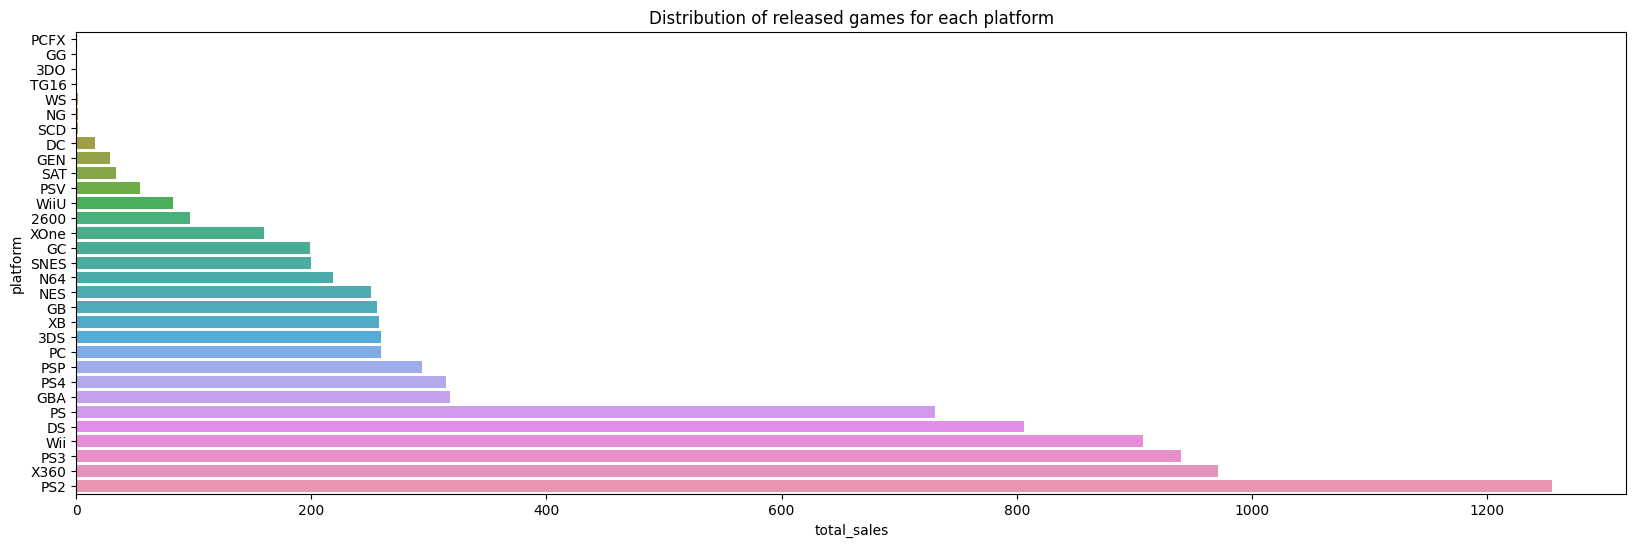

In [29]:
# visualizing the data
plt.figure(figsize=(20,6))
plt.title('Distribution of released games for each platform')
sns.barplot(data=agg_platform, x='total_sales', y='platform')
plt.show()

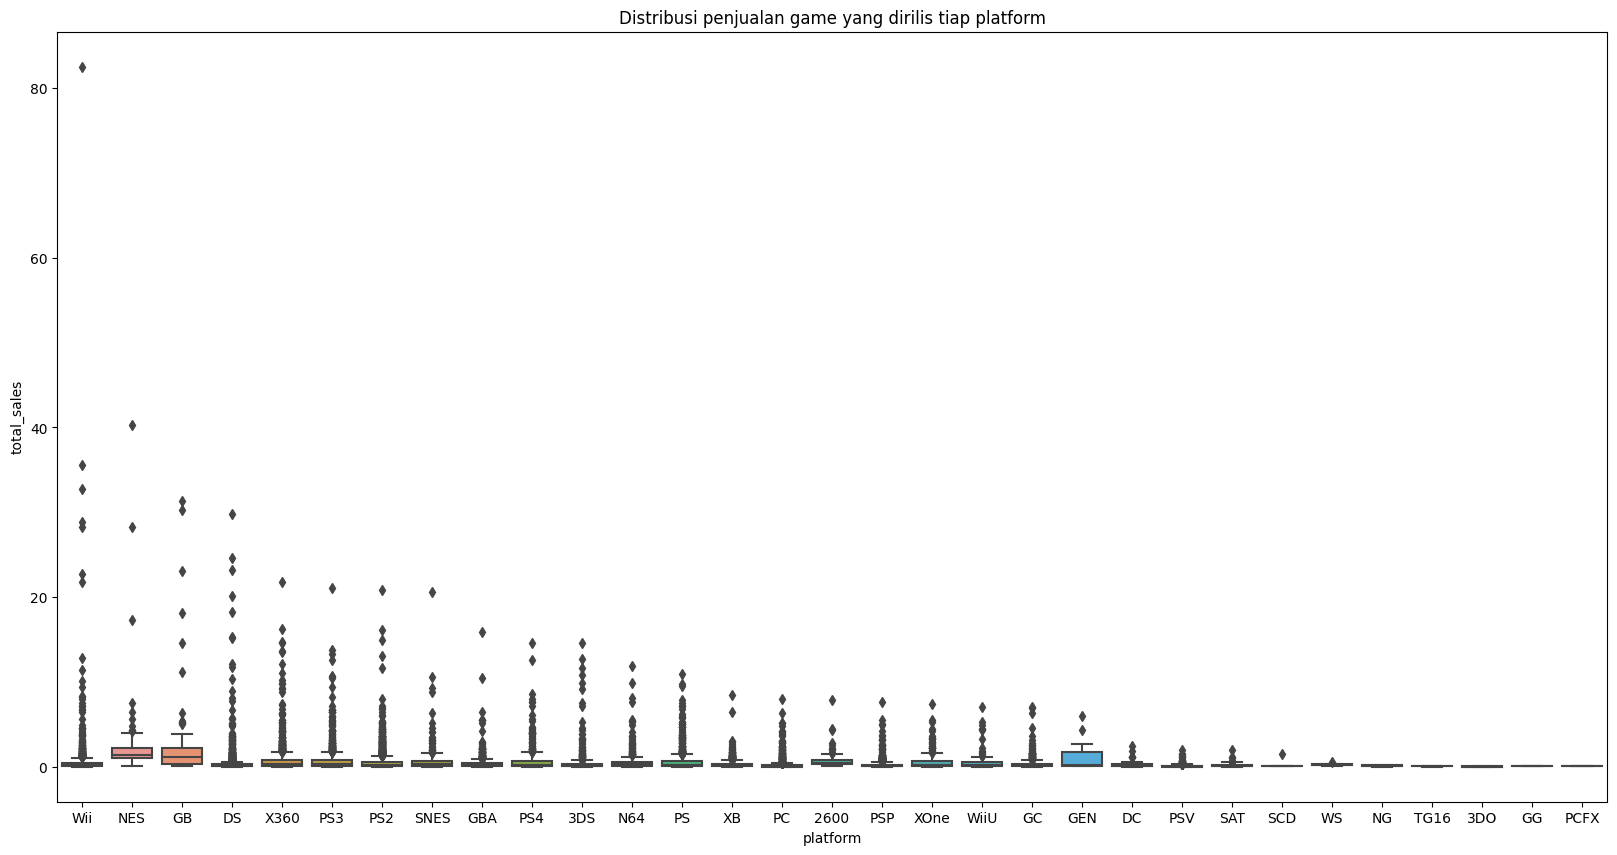

In [30]:
# visualizing in boxplot
plt.figure(figsize=(20,10))
plt.title('Distribusi penjualan game yang dirilis tiap platform')
sns.boxplot(data=df_clean, x="platform", y="total_sales")
plt.show()

**Points to be Analyzed**

a. How does sales vary from one platform to another?

b. Choose the platform with the highest total sales.

**Findings**

a. From the distribution above, it can be inferred that sales vary across different platforms.

b. The platform with the highest total sales is PS2.

### 3.3 (full dataset) Find platforms that were once popular but now have no sales at all. How long does it usually take for a new platform to emerge and for an old platform to fade in popularity? <a id='full_popular_platform'></a>

In [31]:
# drop 0 value in year of release column
df_clean_year = df_clean[df_clean['year_of_release']!=0].reset_index(drop=True)

In [32]:
# Aggregate the total game sales per year for each platform.
agg_year_platform = pd.pivot_table(
    data=df_clean_year, 
    index='year_of_release', 
    columns='platform', 
    values = 'total_sales', 
    aggfunc = 'sum').fillna(0).astype('int')

In [33]:
# show data
pd.set_option('display.max_columns', None)
agg_year_platform

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1982,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1983,5,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1985,0,0,0,0,0,0,0,0,0,0,0,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1986,0,0,0,0,0,0,0,0,0,0,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987,1,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1988,0,0,0,0,0,1,0,0,0,0,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
agg_year_platform.sum()

platform
2600      80
3DO        0
3DS      255
DC        14
DS       799
GB       248
GBA      309
GC       193
GEN       26
GG         0
N64      215
NES      245
NG         0
PC       245
PCFX       0
PS       723
PS2     1227
PS3      925
PS4      312
PSP      284
PSV       51
SAT       30
SCD        1
SNES     196
TG16       0
WS         0
Wii      885
WiiU      80
X360     955
XB       249
XOne     158
dtype: int64

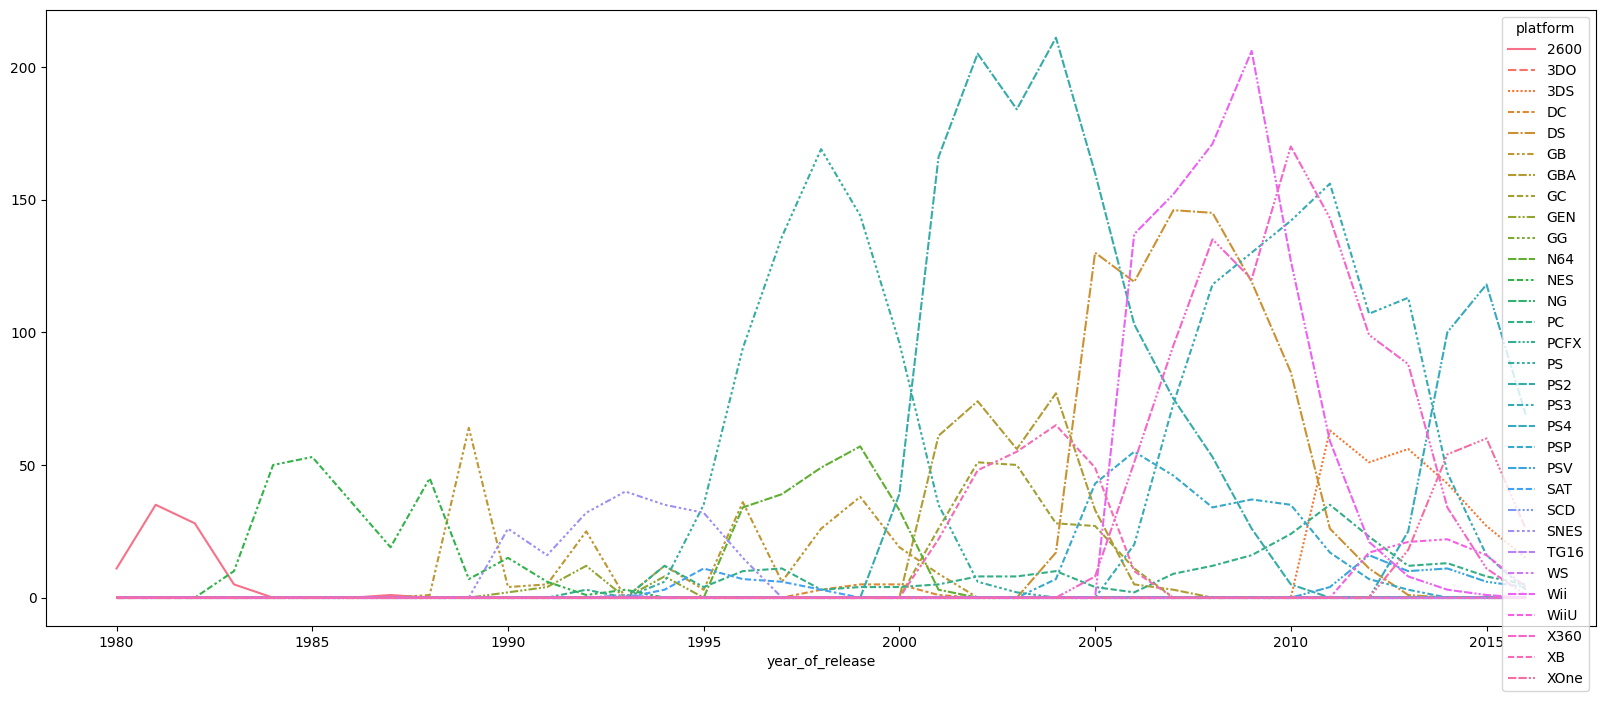

In [35]:
# visualizing the data
plt.figure(figsize=(20,8))
sns.lineplot(data=agg_year_platform)
plt.show()

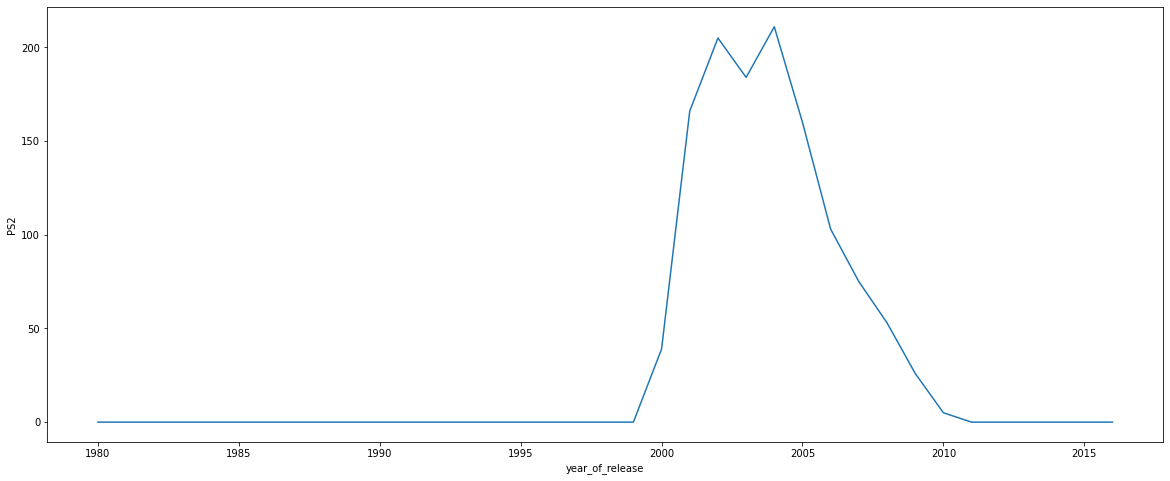

In [34]:
# distribusi popularitas platform 'PS2' tiap tahun
plt.figure(figsize=(20,8))
sns.lineplot(data=agg_year_platform['PS2'])
plt.show()

**Points to be Analyzed**

a. Find platforms that were once popular but now have no sales at all.

b. How long does it usually take for a new platform to emerge and for an old platform to fade in popularity?

**Findings**

a. The platform 2600 peaked in game sales from 1980 to 1982.

b. The NES was at its sales peak from 1983 to 1988.

c. The SNES experienced its highest game sales from 1990 to 1994.

d. The PS achieved its highest game sales from 1995 to 2000.

e. The PS2's peak game sales were from 2001 to 2005.

f. In 2006, popular platforms were DS, PS2, and Wii.

g. In 2007, popular platforms were DS, Wii, and X360.

h. In 2008, PS3 gained popularity and stood alongside other popular platforms, DS, Wii, and X360. These four platforms remained popular until 2010.

i. In 2011, the popular platforms were PS3 and X360. Both of these platforms remained popular until 2013.

j. From 2014 to 2016, PS4 became the only platform with significant sales (popularity).

**Insights**

1. The average lifespan of a platform's popularity is around 2-5 years (based on the popularity data of NES, PS, PS2, DS, Wii, PS3, X360, and PS4).
2. A platform typically takes about 2-3 years to become popular.
3. PS2 had the highest level of sales, reaching 1227 units. PS2 entered the market in 2000 and had no sales by 2011.

### 3.4 (reference dataset) Which platforms have the highest sales? Which platforms are growing or shrinking? Select several platforms that have potential for profitability. Are the sales differences significant? What about the average sales on various platforms? <a id='reference_platform'></a>

In [36]:
# prepare reference dataset by filtering the year of release is more than 2013
reference_df = df_clean[df_clean['year_of_release']>=2013].reset_index(drop=True)
reference_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [37]:
# data aggregation of games for each platform in the reference dataset.
ref_agg_platform = pd.pivot_table(data=reference_df, index='platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales').reset_index()
ref_agg_platform

,platform,total_sales
0,DS,1.54
1,PSP,3.50
2,Wii,13.66
3,PSV,32.99
4,PC,39.43
5,WiiU,64.63
6,X360,136.80
7,3DS,143.25
8,XOne,159.32
9,PS3,181.43


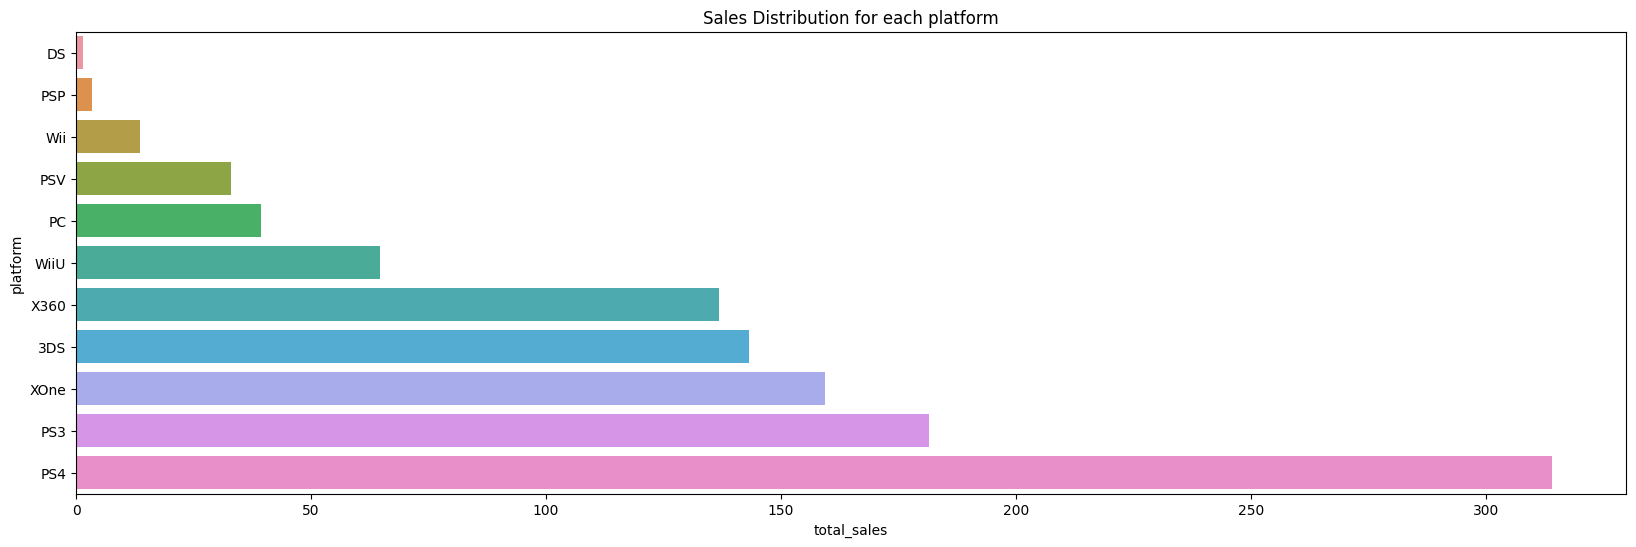

In [38]:
# visualize the data
plt.figure(figsize=(20,6))
plt.title('Sales Distribution for each platform in agreggated data')
sns.barplot(data=ref_agg_platform, x='total_sales', y='platform')
plt.show()

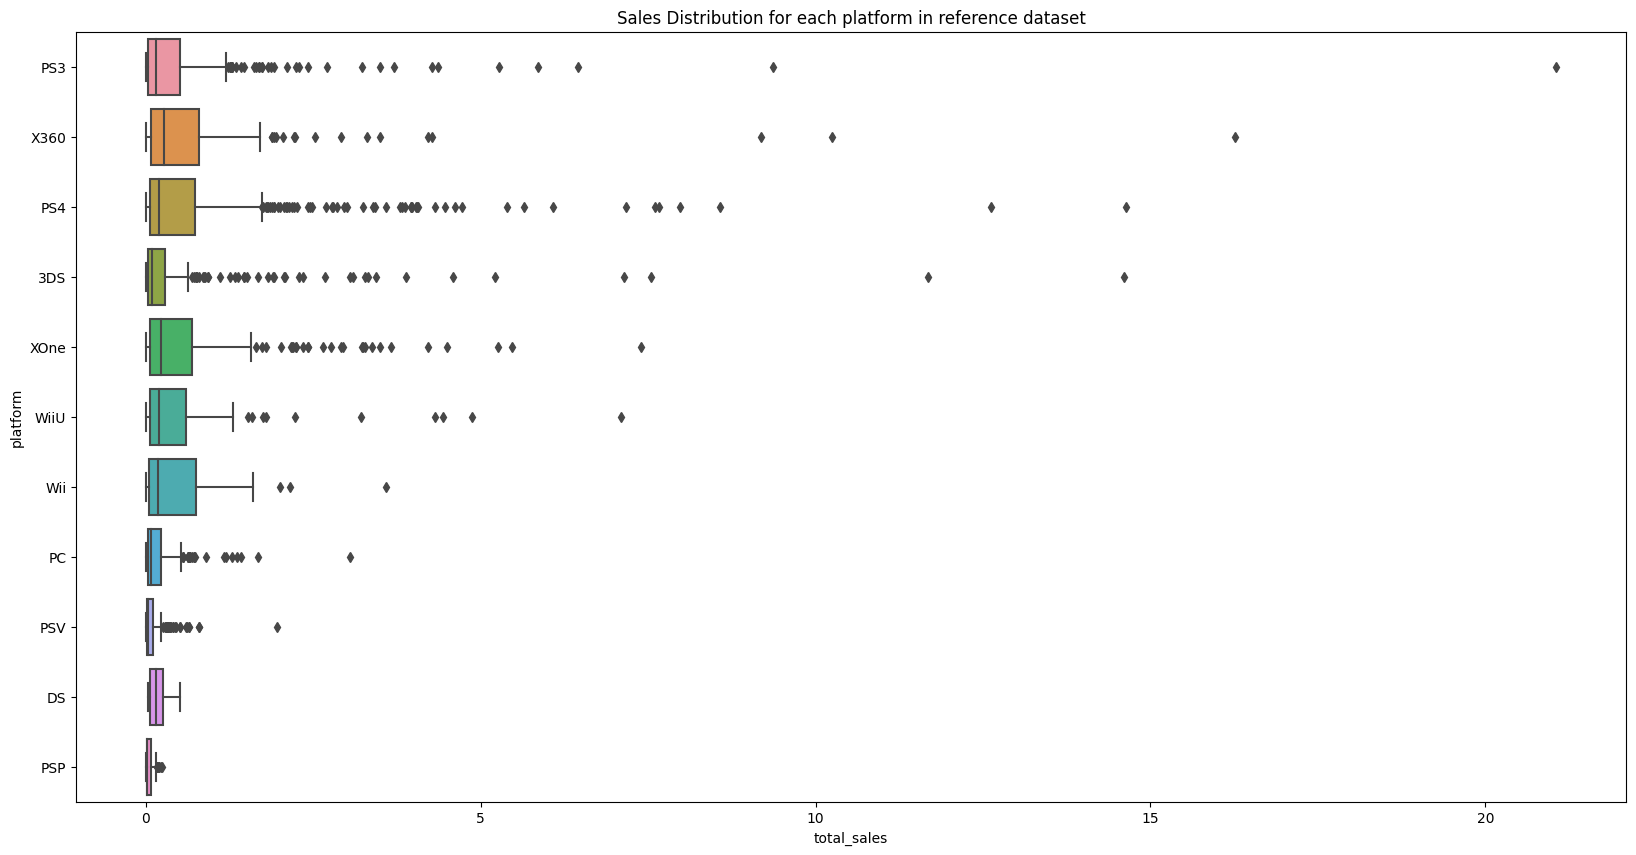

In [39]:
# visualize in boxplot
plt.figure(figsize=(20,10))
plt.title('Sales Distribution for each platform in reference dataset')
sns.boxplot(data=reference_df, x="total_sales", y="platform")
plt.show()

**Points to be Analyzed**

a. Which platforms have the highest sales?

b. Are the sales differences significant?

c. What about the average sales on various platforms? Describe your findings.

**Findings**

a. The platform with the highest sales is PS4.

b. There are several significant differences in sales. Sales on platforms 3DS, PC, PSV, DS, and PSP have noticeable differences compared to platforms PS3, X360, PS4, XOne, WiiU, and Wii, which have higher sales.

c. The average sales across various platforms also show diverse variations. However, the formed pattern indicates that the median is closer to the lower end (Q1), resulting in a positively skewed distribution.

### 3.5 (reference dataset) How does sales vary from one platform to another? Choose the platform with the highest total sales and create its distribution based on yearly data <a id='reference_sales'></a>

In [40]:
# drop 0 value in year of release column
df_clean_ref_year = reference_df[reference_df['year_of_release']!=0].reset_index(drop=True)

In [42]:
# data aggregation of the number of released games for each platform 
ref_agg_year_platform = pd.pivot_table(
    data=df_clean_ref_year, 
    index='year_of_release', 
    columns='platform', 
    values = 'total_sales', 
    aggfunc = 'sum').fillna(0).astype('int')

In [43]:
# show data
pd.set_option('display.max_columns', None)
ref_agg_year_platform

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56,1,12,113,25,3,10,8,21,88,18
2014,43,0,13,47,100,0,11,3,22,34,54
2015,27,0,8,16,118,0,6,1,16,11,60
2016,15,0,5,3,69,0,4,0,4,1,26


In [44]:
ref_agg_year_platform.sum()

platform
3DS     141
DS        1
PC       38
PS3     179
PS4     312
PSP       3
PSV      31
Wii      12
WiiU     63
X360    134
XOne    158
dtype: int64

<Axes: xlabel='year_of_release'>

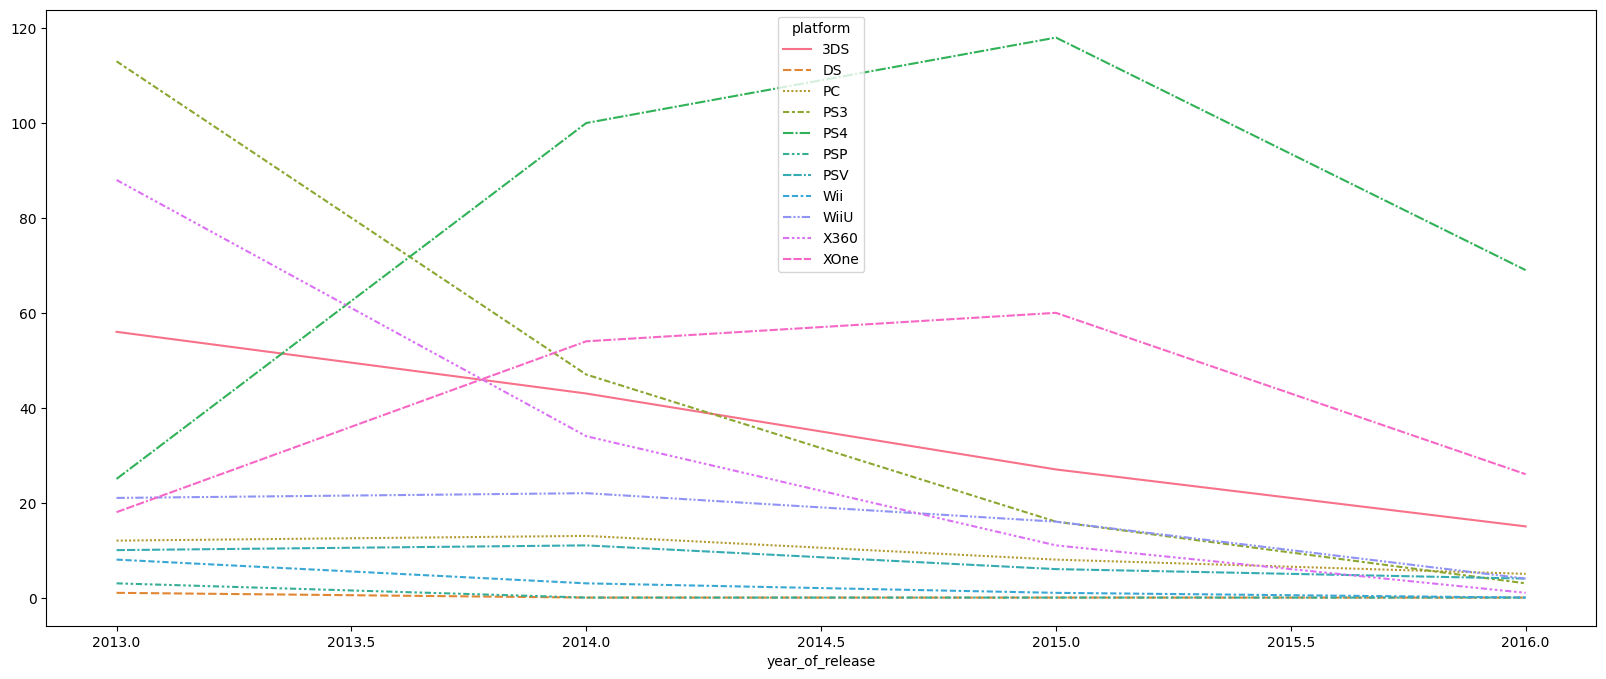

In [45]:
# visualize the data
plt.figure(figsize=(20,8))
sns.lineplot(data=ref_agg_year_platform)

**Points to be Analyzed**

a. Which platforms are growing or shrinking?

b. Select several platforms that have potential for profitability!

**Findings**

a. The platform with the highest sales in the year range 2013-2016 is PS4.

b. Based on the data from 2013 to 2016, all platforms experienced a downward trend.

c. The growth of PS4 can be considered very rapid within a span of 1 year (2013 - 2014).

d. A platform that has the potential for profitability is PS4, as its sales started to rise in 2014. Therefore, it is still in demand and has the potential for profitability based on the trend.

### 3.6 (reference dataset) Examine how user and professional reviews influence sales on the most popular platform (PS 4 - based on my analysis in point 3.5) <a id='reference_review_ps4'></a>

In [58]:
# prepare the dataset
ref_df_ps4 = reference_df.groupby(['platform', 'name'])[['total_sales', 'critic_score', 'user_score']].sum().query('platform == "PS4" & critic_score > 0 & user_score > 0').reset_index()
ref_df_ps4 = ref_df_ps4[['name', 'platform', 'total_sales', 'critic_score', 'user_score']]
ref_df_ps4

,name,platform,total_sales,critic_score,user_score
0,7 Days to Die,PS4,0.14,45.0,5.9
1,Aegis of Earth: Protonovus Assault,PS4,0.02,57.0,7.8
2,Agatha Christie's The ABC Murders,PS4,0.02,67.0,6.2
3,Alien: Isolation,PS4,1.12,79.0,8.1
4,Angry Birds Star Wars,PS4,0.22,47.0,2.0
...,...,...,...,...,...
244,World of Final Fantasy,PS4,0.34,77.0,8.3
245,Worms: WMD,PS4,0.03,78.0,7.6
246,XCOM 2,PS4,0.14,88.0,8.0
247,Zombie Army Trilogy,PS4,0.20,62.0,6.8


In [59]:
# data correlation for numerical columns
ref_df_ps4[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


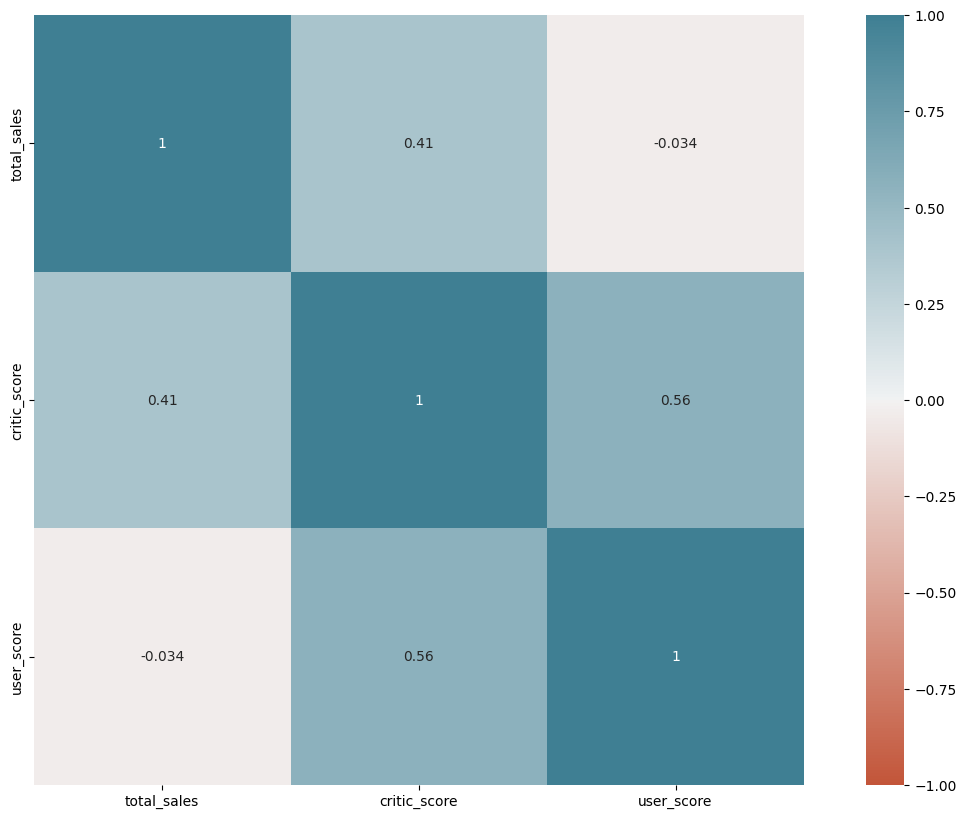

In [60]:
# Correlation matrix to identify the relationships between numeric variables in the dataset "ref_df_ps4".
corr = ref_df_ps4[['total_sales', 'critic_score', 'user_score']].corr()
ax = plt.subplots(figsize = (16,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=256),
    square=True,
    annot=True
)

**Results of Correlation Matrix Analysis**

Reference for interpreting correlation: https://www.dummies.com/article/academics-the-arts/math/statistics/how-to-interpret-a-correlation-coefficient-r-169792/

1. Total sales and critic score exhibit a weak to moderate correlation (0.41). As total sales increase, there's a higher likelihood of a higher critic score.

2. User score and critic score demonstrate a moderate to high correlation (0.56). As user score increases, there's a higher likelihood of a higher critic score.

3. Total sales and user score do not have a significant mutual relationship (-0.034).

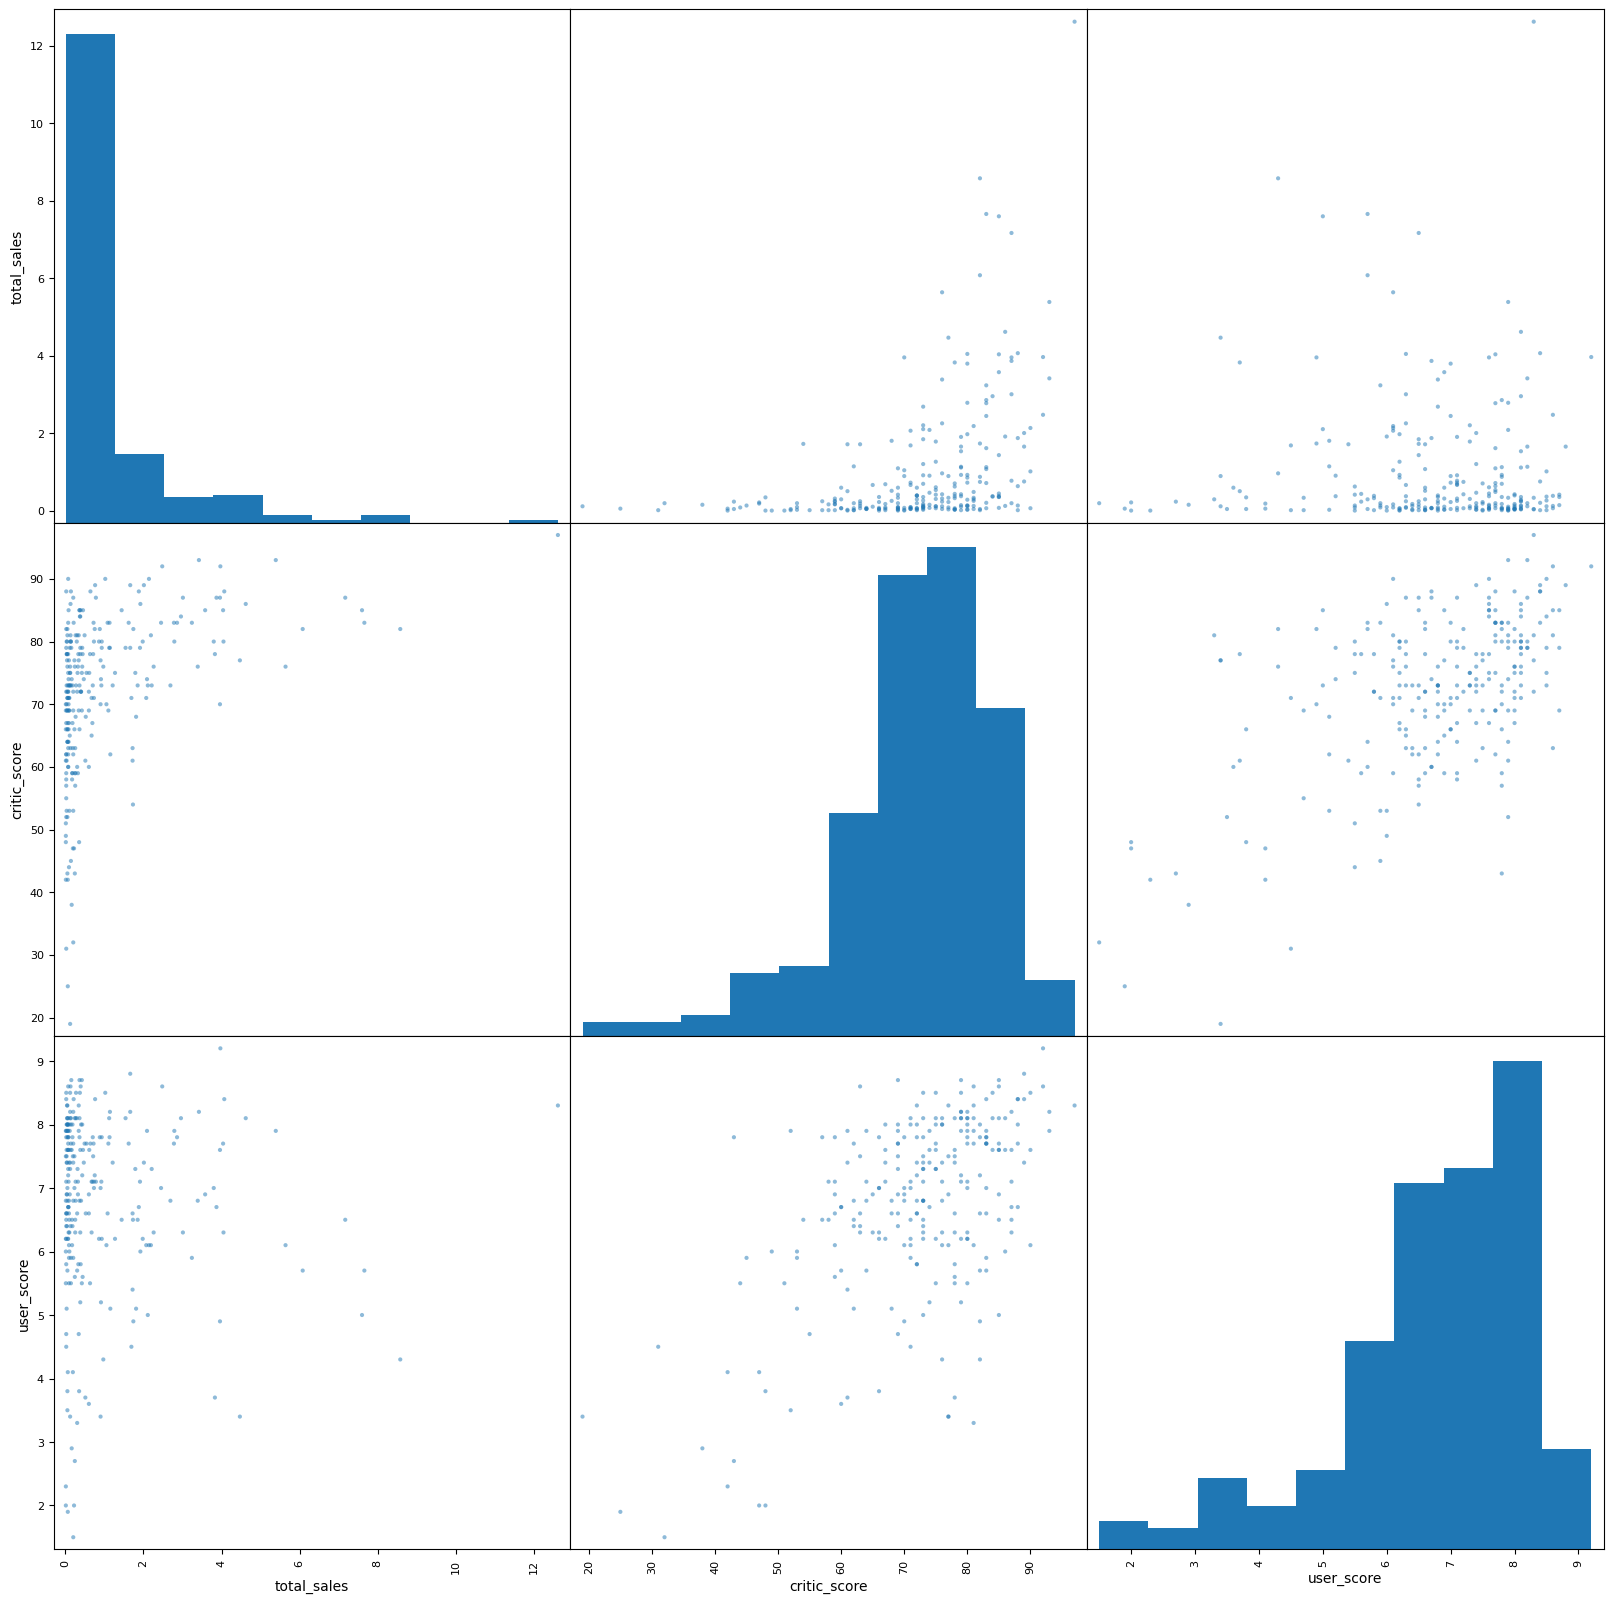

In [61]:
# show the correlation using scatter matrix in for ref_df_ps4
pd.plotting.scatter_matrix(ref_df_ps4, figsize=(20,20))
plt.show()

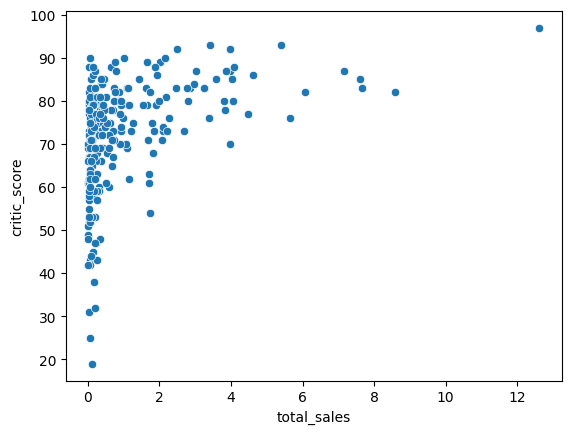

In [64]:
# showing the graph between total_sales and critic score.
sns.scatterplot(data=ref_df_ps4, x='total_sales', y='critic_score')
plt.show()

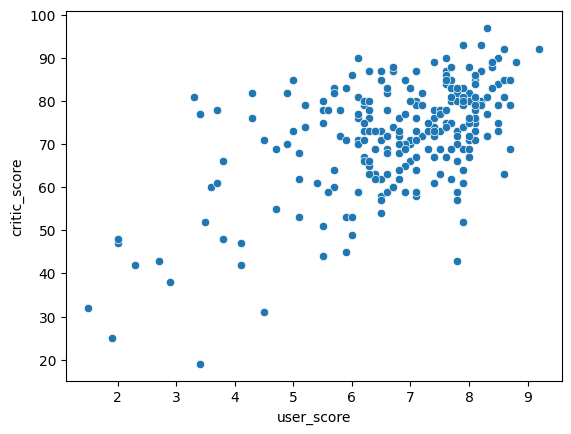

In [65]:
# showing the graph between user_score and critic score.
sns.scatterplot(data=ref_df_ps4, x='user_score', y='critic_score')
plt.show()

**Results of Scatter Matrix Analysis**

Reference for interpreting scatter matrix: https://www.texasgateway.org/resource/interpreting-scatterplots#:~:text=The%20closer%20the%20data%20points,to%20have%20a%20positive%20correlation.

1. The scatter matrix between total_sales and critic score is distributed to the left, but there are some data points in the upper right. This indicates that total_sales and critic score have a weak positive correlation trend since the data points are still spread out.

2. The scatter matrix between critic_score and user_score forms an upward-rightward line. This indicates that critic_score and user_score have a trend of 'low positive correlation' as the data points are still spread out.

3. The scatter matrix between total_sales and user_score shows a spread of data without indicating any pattern. This suggests that total_sales and user_score have 'no correlation.'

**Conclusion**

From the correlation heatmap and scatter matrix graphs above, conclusions can be drawn regarding interrelated variables:
- total_sales and critic score exhibit a moderate weak positive relationship. As total_sales increases, there is a higher likelihood of a higher critic_score.
- critic_score and user_score show a moderate to high positive relationship. As user_score increases, there is a higher likelihood of a higher critic_score.

### 3.7 (reference dataset) Distribution of User and Professional Reviews and whether reviews influence sales on the second popular platform (PS3). Additionally, the comparison between the most popular platform (PS4) and the second popular platform (PS3) <a id='reference_ps3_ps4'></a>

In [66]:
# preparing the dataset
top2_ref_df = reference_df.groupby(['platform', 'name'])[['total_sales', 'critic_score', 'user_score']].sum().query('platform == "PS3" & critic_score > 0 & user_score > 0').reset_index()
top2_ref_df = top2_ref_df[['name', 'platform', 'total_sales', 'critic_score', 'user_score']]
top2_ref_df

,name,platform,total_sales,critic_score,user_score
0,2014 FIFA World Cup Brazil,PS3,0.61,73.0,4.3
1,Aliens: Colonial Marines,PS3,0.60,43.0,3.6
2,Angry Birds Star Wars,PS3,0.29,49.0,3.6
3,Ar Nosurge: Ode to an Unborn Star,PS3,0.16,67.0,7.8
4,Armored Core: Verdict Day,PS3,0.12,66.0,7.4
...,...,...,...,...,...
115,Tom Clancy's Splinter Cell: Blacklist,PS3,0.94,84.0,7.7
116,WWE 2K14,PS3,1.14,74.0,7.5
117,WWE 2K15,PS3,0.78,55.0,3.1
118,Xblaze: Lost Memories,PS3,0.02,63.0,6.2


In [68]:
# data correlation for numerical columns
top2_ref_df[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.333807,0.022691
critic_score,0.333807,1.000000,0.599920
user_score,0.022691,0.599920,1.000000


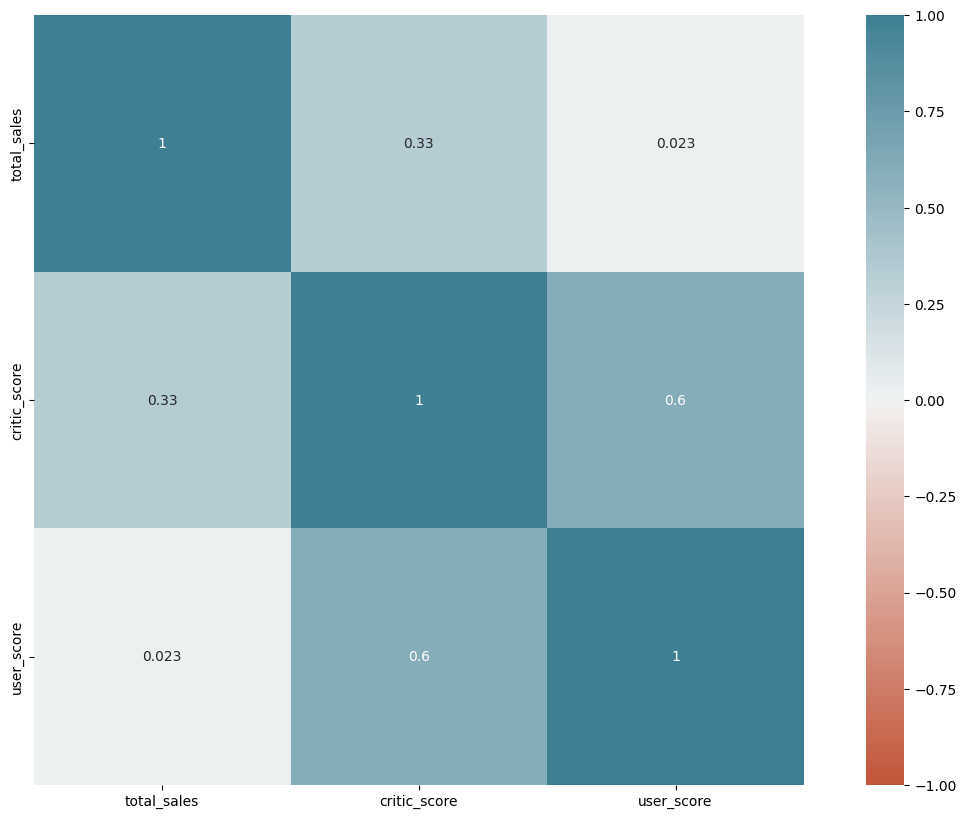

In [69]:
# Correlation matrix to identify the relationships between numeric variables in the dataset "top2_ref_df".
corr = top2_ref_df[['total_sales', 'critic_score', 'user_score']].corr()
ax = plt.subplots(figsize = (16,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=256),
    square=True,
    annot=True
)

**Results of Correlation Matrix Analysis**

Reference for interpreting correlation: https://www.dummies.com/article/academics-the-arts/math/statistics/how-to-interpret-a-correlation-coefficient-r-169792/

1. Total sales and critic score have a weak correlation (0.33). As total_sales increase, there is a slight possibility that the critic score might also increase.

2. User_score and critic_score exhibit a moderate to high correlation (0.60). As user_score increases, there is a higher likelihood of a higher critic_score.

3. Total sales and user_score do not have a significant mutual relationship (0.023).

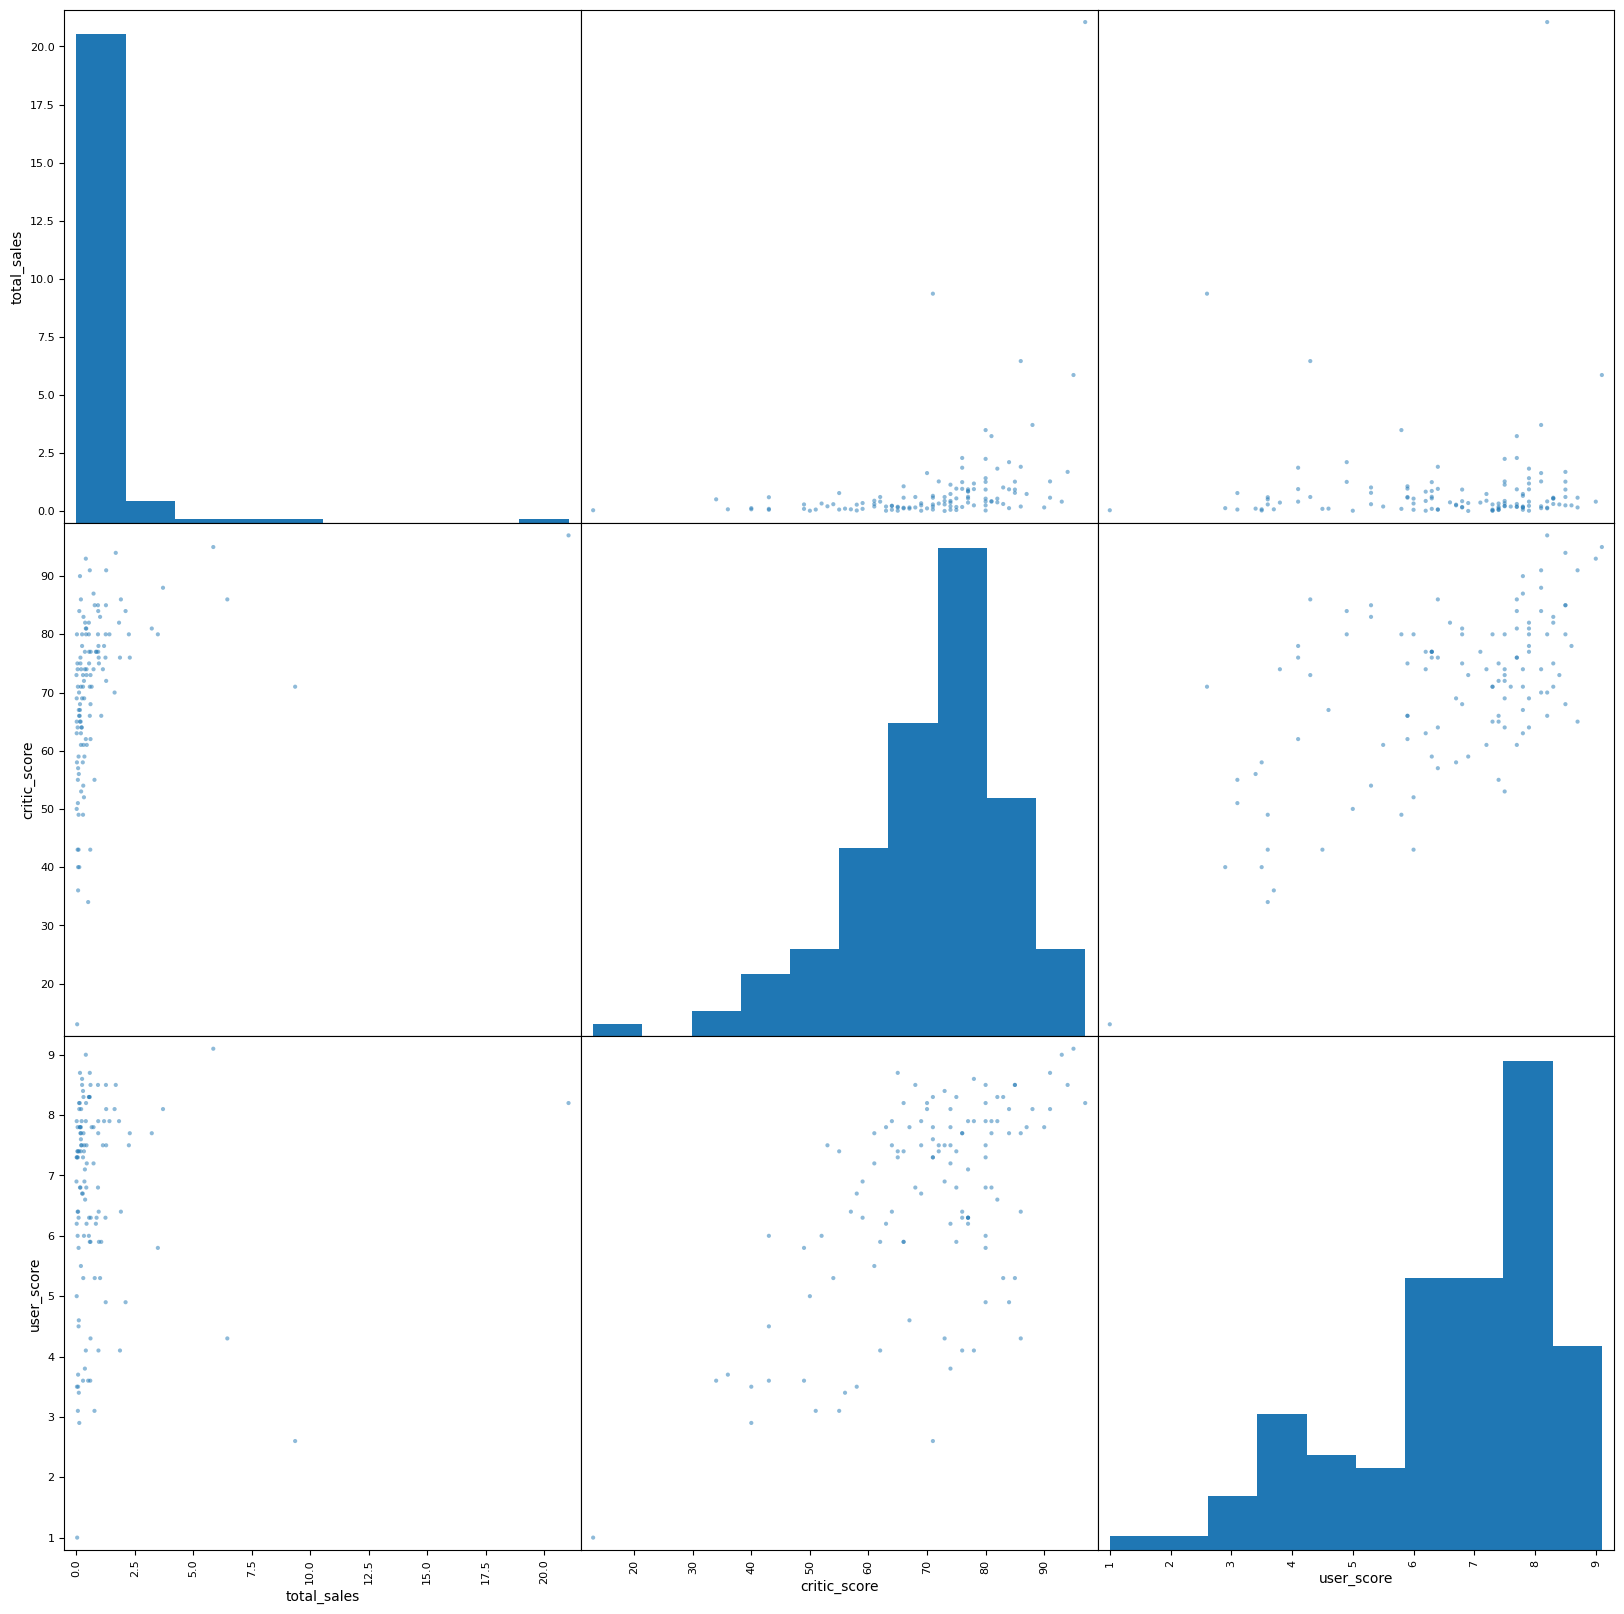

In [70]:
# correlation in scatter matrix
pd.plotting.scatter_matrix(top2_ref_df, figsize=(20,20))
plt.show()

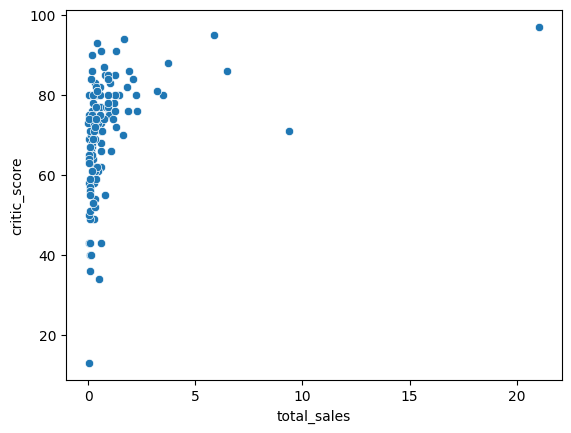

In [71]:
# showing the graph between total_sales and critic score.
sns.scatterplot(data=top2_ref_df, x='total_sales', y='critic_score')
plt.show()

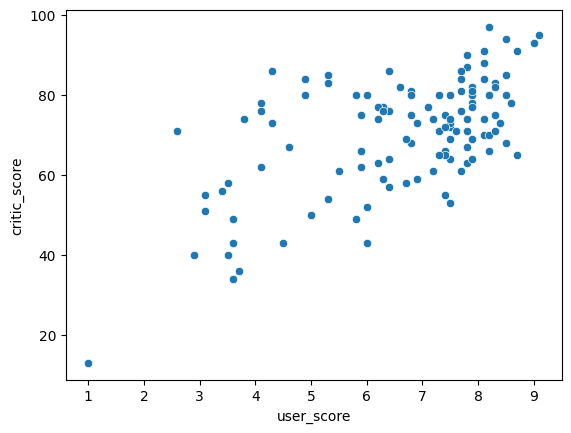

In [72]:
# showing the graph between user_score and critic score.
sns.scatterplot(data=top2_ref_df, x='user_score', y='critic_score')
plt.show()

**Results of Scatter Matrix Analysis**

Reference for interpreting scatter matrix: https://www.texasgateway.org/resource/interpreting-scatterplots#:~:text=The%20closer%20the%20data%20points,to%20have%20a%20positive%20correlation.

1. The scatter matrix between total_sales and critic score is distributed to the left, but there are some data points in the upper right. This indicates that total_sales and critic score have a weak positive correlation trend since the data points are still spread out.

2. The scatter matrix between critic_score and user_score forms an upward-rightward line. This indicates that critic_score and user_score have a trend of 'low positive correlation' as the data points are still spread out.

3. The scatter matrix between total_sales and user_score shows a spread of data without indicating any pattern. This suggests that total_sales and user_score have 'no correlation.'

**Results of Analysis of the Comparison between Game Sales on Platforms 'PS4' and 'PS3'**

The results indicate consistency, with a strong enough relationship existing only between critic score and user score, while the correlation between total_sales and critic score shows a weak positive correlation.

### 3.8 (reference dataset) Observe the overall distribution of games based on genre. What can we conclude about the most profitable genres? Can you make generalizations about genres with high and low sales? <a id='reference_genre'></a>

In [73]:
# data distribution in genre column
reference_df['genre'].value_counts()

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: count, dtype: int64

In [74]:
# data aggregation for each genre in reference dataset
ref_agg_genre = pd.pivot_table(data=reference_df, index='genre', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales').reset_index()
ref_agg_genre

,genre,total_sales
0,Puzzle,3.17
1,Strategy,10.08
2,Simulation,21.76
3,Adventure,23.64
4,Fighting,35.31
5,Racing,39.89
6,Platform,42.63
7,Misc,62.82
8,Role-Playing,145.89
9,Sports,150.65


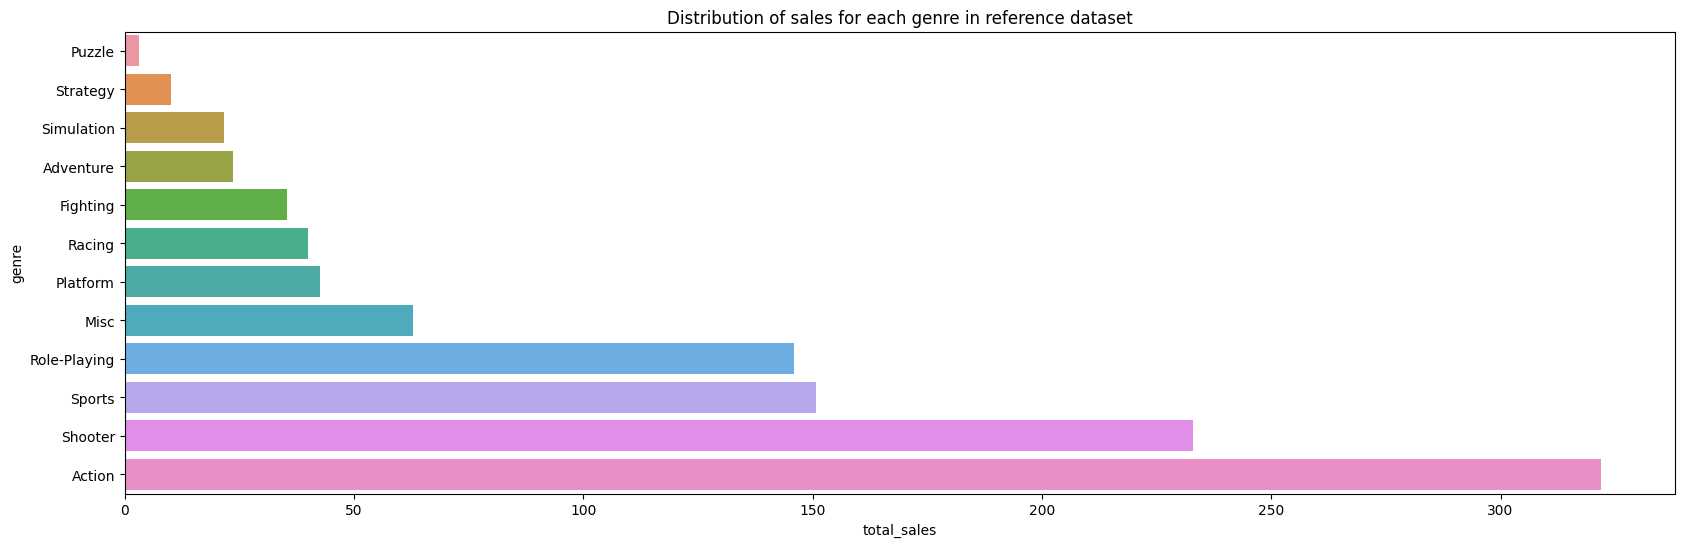

In [75]:
# data distribution
plt.figure(figsize=(20,6))
plt.title('Distribution of sales for each genre in reference dataset')
sns.barplot(data=ref_agg_genre, x='total_sales', y='genre')
plt.show()

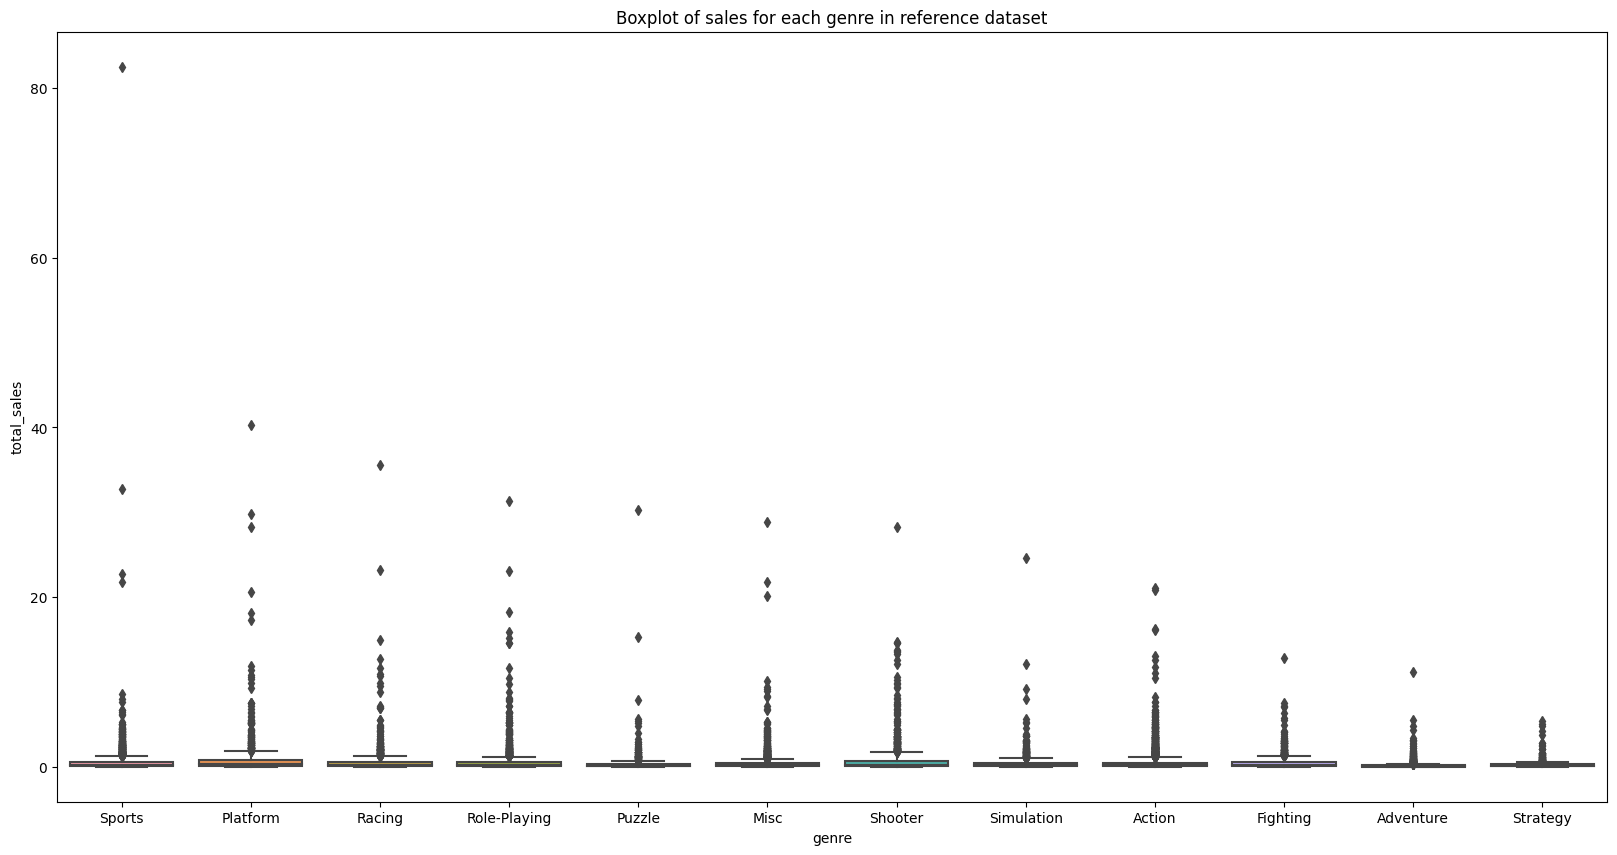

In [76]:
# visualizing in boxplot
plt.figure(figsize=(20,10))
plt.title('Boxplot of sales for each genre in reference dataset')
sns.boxplot(data=df_clean, x="genre", y="total_sales")
plt.show()

**Points to be Analyzed**

a. How does sales vary from one genre to another?

b. Choose the genre with the highest total sales / most profitable.

**Findings**

a. From the distribution above, it can be observed that sales vary across different genres.

b. The genre with the highest total sales is action.

### 3.9 (reference dataset) User Profiling by Region <a id='reference_profiling'></a>

#### 3.9.1 Top 5 platforms in the NA, EU, and JP regions, and explain the variations in market share from one region to another

In [77]:
# data aggregation of sales for each platform in NA, EU, JP regions
agg_selected_region_platform = pd.pivot_table(data=reference_df, index='platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').sort_values(by='jp_sales')
agg_selected_region_platform

,eu_sales,jp_sales,na_sales
platform,,,
DS,0.85,0.00,0.57
PC,25.36,0.00,11.11
Wii,5.93,0.05,6.56
XOne,51.59,0.34,93.12
X360,42.52,0.51,81.66
PSP,0.17,3.29,0.00
WiiU,19.85,10.88,29.21
PS4,141.09,15.96,108.74
PSV,6.10,18.59,5.04


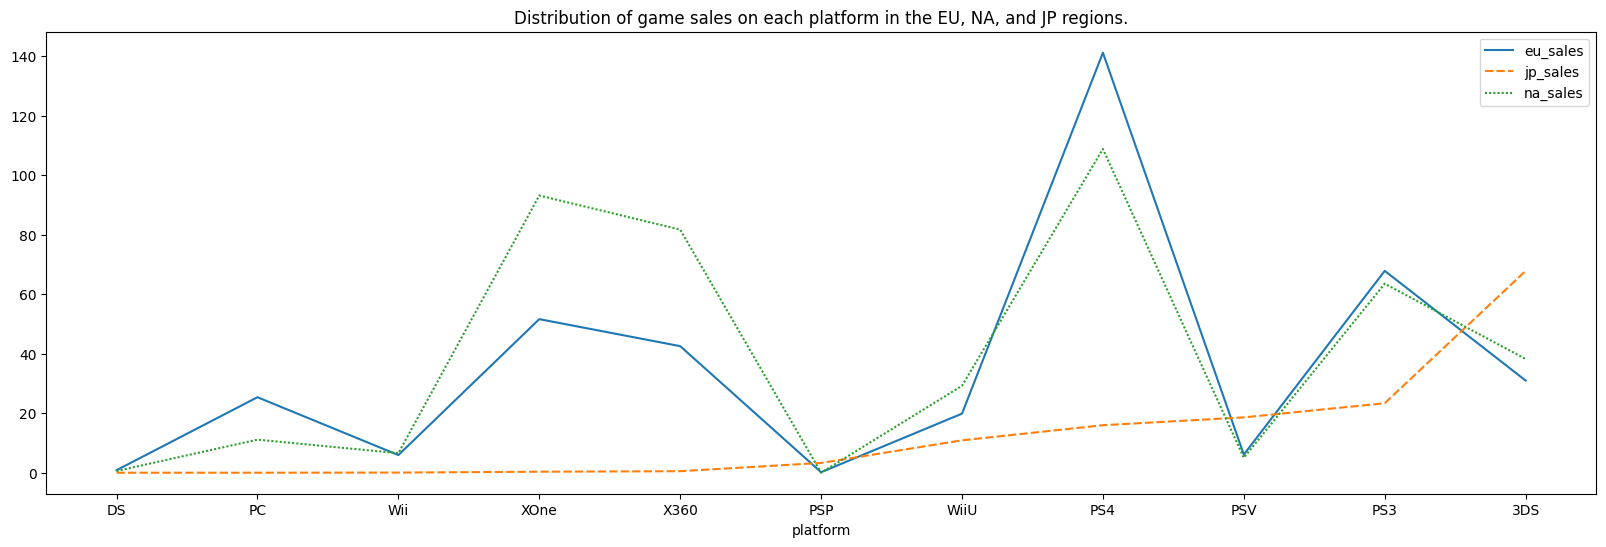

In [78]:
# visualizing the sales for each platform in NA, EU, JP regions
plt.figure(figsize=(20,6))
plt.title('Distribution of game sales on each platform in the EU, NA, and JP regions')
sns.lineplot(data=agg_selected_region_platform)
plt.show()

**Findings**

The graphs for the EU and NA regions show similar patterns with PS4 as the top platform.

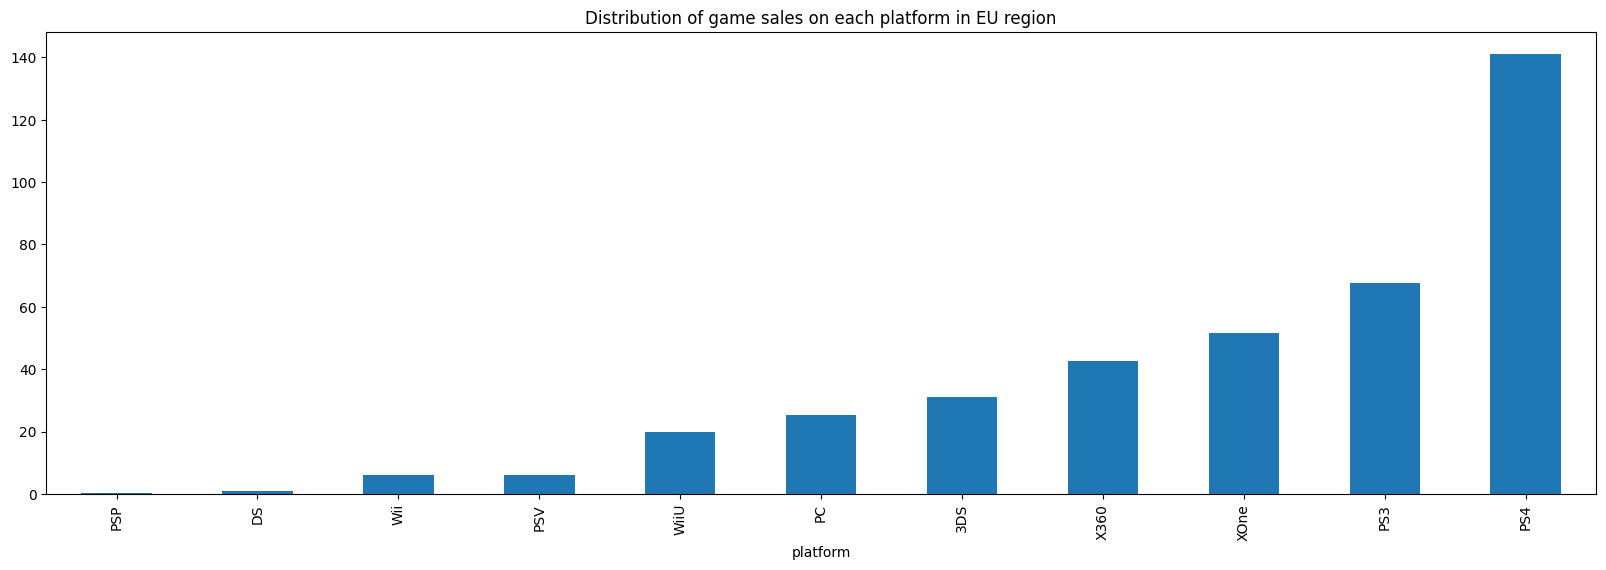

In [79]:
# visualizing the sales for each platform in EU region
eu = agg_selected_region_platform.sort_values(by='eu_sales')
plt.figure(figsize=(20,6))
plt.title('Distribution of game sales on each platform in EU region')
eu['eu_sales'].plot(kind='bar')
plt.show()

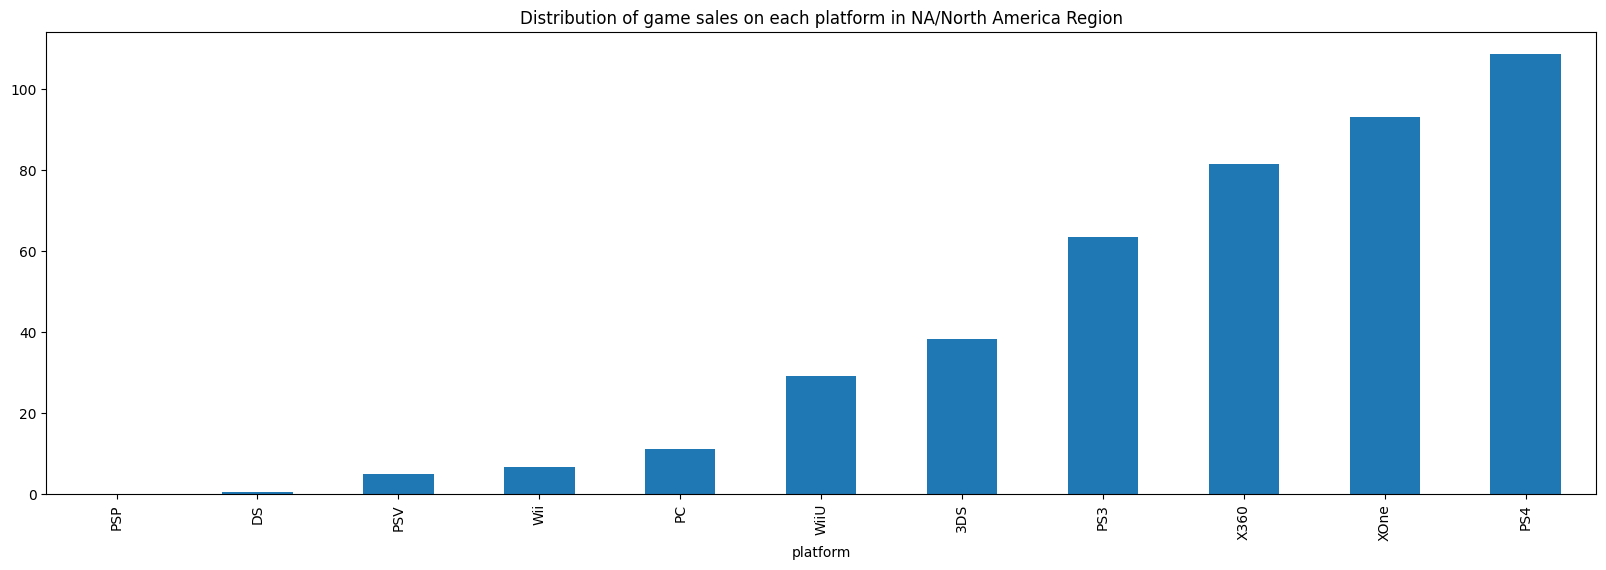

In [81]:
# visualizing the sales for each platform in NA region
na = agg_selected_region_platform.sort_values(by='na_sales')
plt.figure(figsize=(20,6))
plt.title('Distribution of game sales on each platform in NA/North America Region')
na['na_sales'].plot(kind='bar')
plt.show()

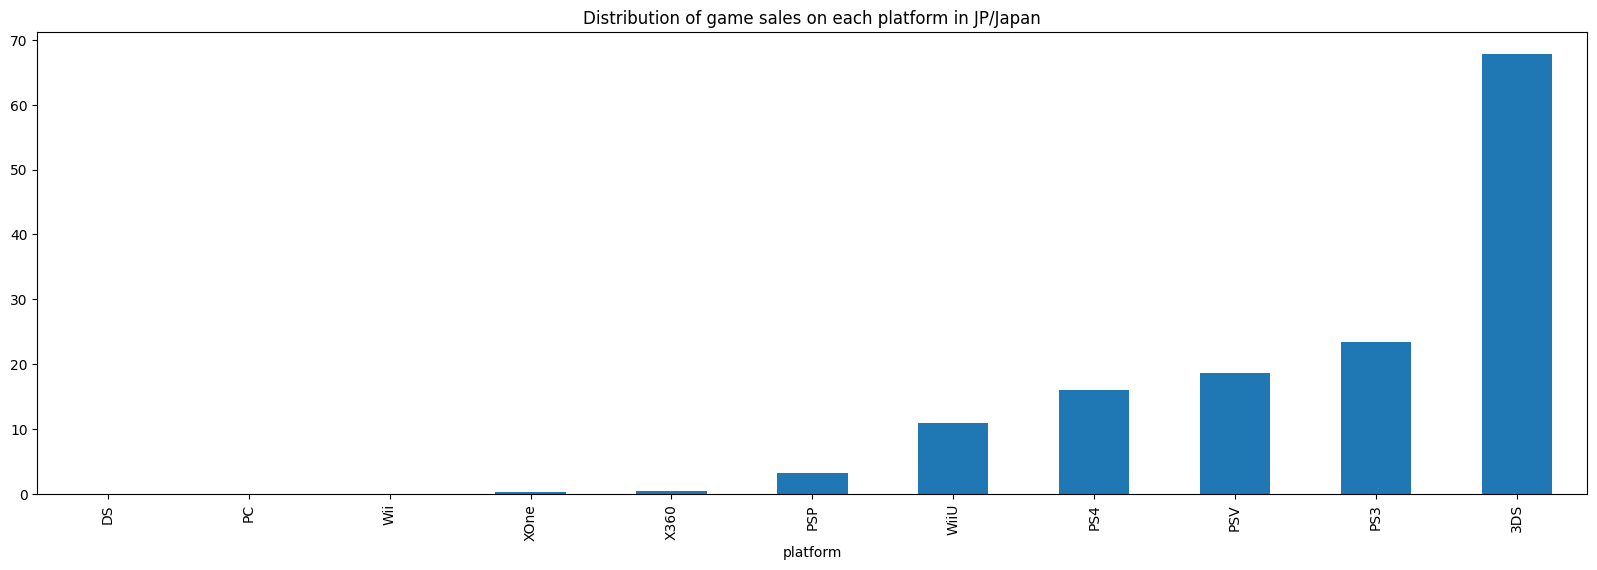

In [82]:
# visualizing the sales for each platform in JP region
jp = agg_selected_region_platform.sort_values(by='jp_sales')
plt.figure(figsize=(20,6))
plt.title('Distribution of game sales on each platform in JP/Japan')
jp['jp_sales'].plot(kind='bar')
plt.show()

**Findings**

1. The top 5 platforms in each region are as follows:
    - EU: PS4, PS3, XOne, X360, 3DS
    - NA: PS4, XOne, X360, PS3, 3DS
    - JP: 3DS, PS3, PSV, PS4, WiiU
2. The sales variations on each platform are as follows:
    - Game sales on the DS platform are not popular in any region. Its sales are less than 1 million USD.
    - Game sales on the PSP platform are not popular in EU and NA but are relatively popular in Japan.
    - Game sales on the PC platform are not popular in Japan but have significant sales in EU and NA.
    - Game sales on the Wii platform are not popular in Japan but have reasonable sales in EU and NA.
    - Game sales on the PSV platform are less popular in EU and NA, but it ranks third in Japan.
    - Game sales on the WiiU platform are moderately popular in all three regions, with total sales ranging from 10 million USD to 29 million USD.
    - Game sales on the PS4 platform are the highest in EU and NA and rank fourth in JP.
    - Game sales on the 3DS platform are the highest in JP and rank fifth in EU and NA.
    - Game sales on the PS3 platform rank third highest in EU and JP and fourth highest in NA.
    - Game sales on the XOne platform rank second in NA, third in EU, but are not popular in JP.
    - Game sales on the X360 platform rank third in NA, fourth in EU, but are not popular in Japan.

**Insight**

1. Based on the reference dataset, the sales variations for the top 5 platforms are consistent in the EU and NA regions.
2. Game sales on the PS4, 3DS, and PS3 platforms are consistently among the top 5 platforms in all three regions.

**Recommendation**

1. By understanding the sales behavior on each platform, the focus can be shifted towards selling games for the most popular platforms as the primary sales target.

#### 3.9.2. Top genres in the NA, EU, and JP regions in reference dataset

In [83]:
# data aggregation of sales for each genre in NA, EU, JP regions
agg_selected_region_genre = pd.pivot_table(data=reference_df, index='genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').sort_values(by='jp_sales')
agg_selected_region_genre

,eu_sales,jp_sales,na_sales
genre,,,
Puzzle,1.00,1.18,0.83
Strategy,4.22,1.77,3.28
Racing,20.19,2.30,12.96
Simulation,10.92,4.52,4.86
Platform,15.58,4.79,18.14
Sports,60.52,5.41,65.27
Adventure,8.25,5.82,7.14
Shooter,87.86,6.61,109.74
Fighting,8.55,7.65,15.55


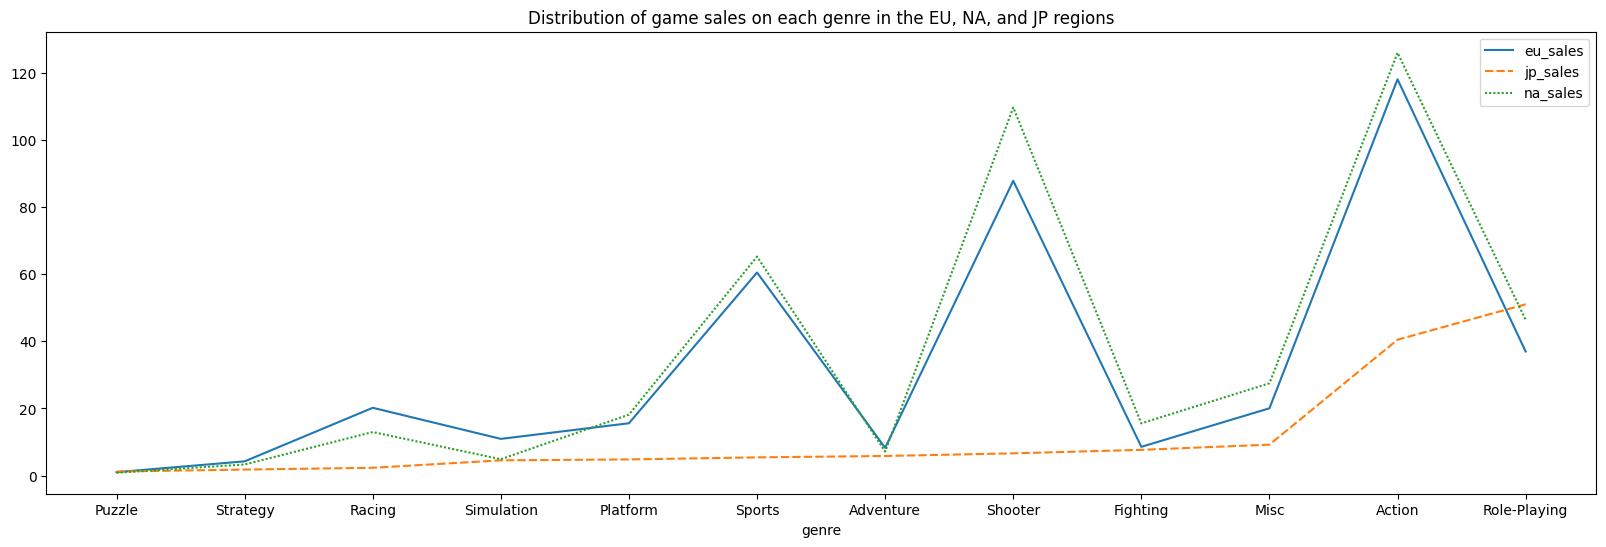

In [84]:
# visualizing the sales for each genre in NA, EU, JP regions
plt.figure(figsize=(20,6))
plt.title('Distribution of game sales on each genre in the EU, NA, and JP regions')
sns.lineplot(data=agg_selected_region_genre)
plt.show()

**Findings**

The patterns in the EU and NA regions are similar, with the highest-selling genre being action.

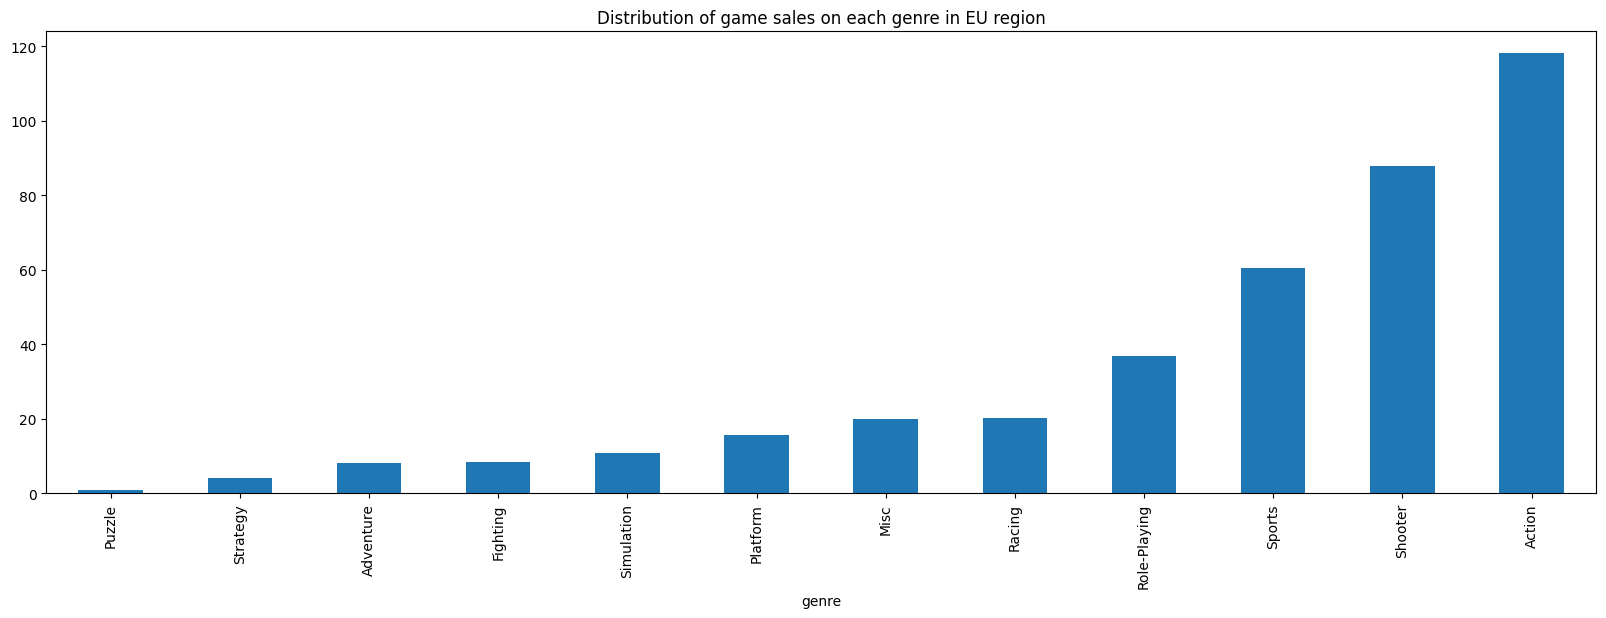

In [85]:
# visualizing the sales for each genre in EU region
eu_genre = agg_selected_region_genre.sort_values(by='eu_sales')
plt.figure(figsize=(20,6))
plt.title('Distribution of game sales on each genre in EU region')
eu_genre['eu_sales'].plot(kind='bar')
plt.show()

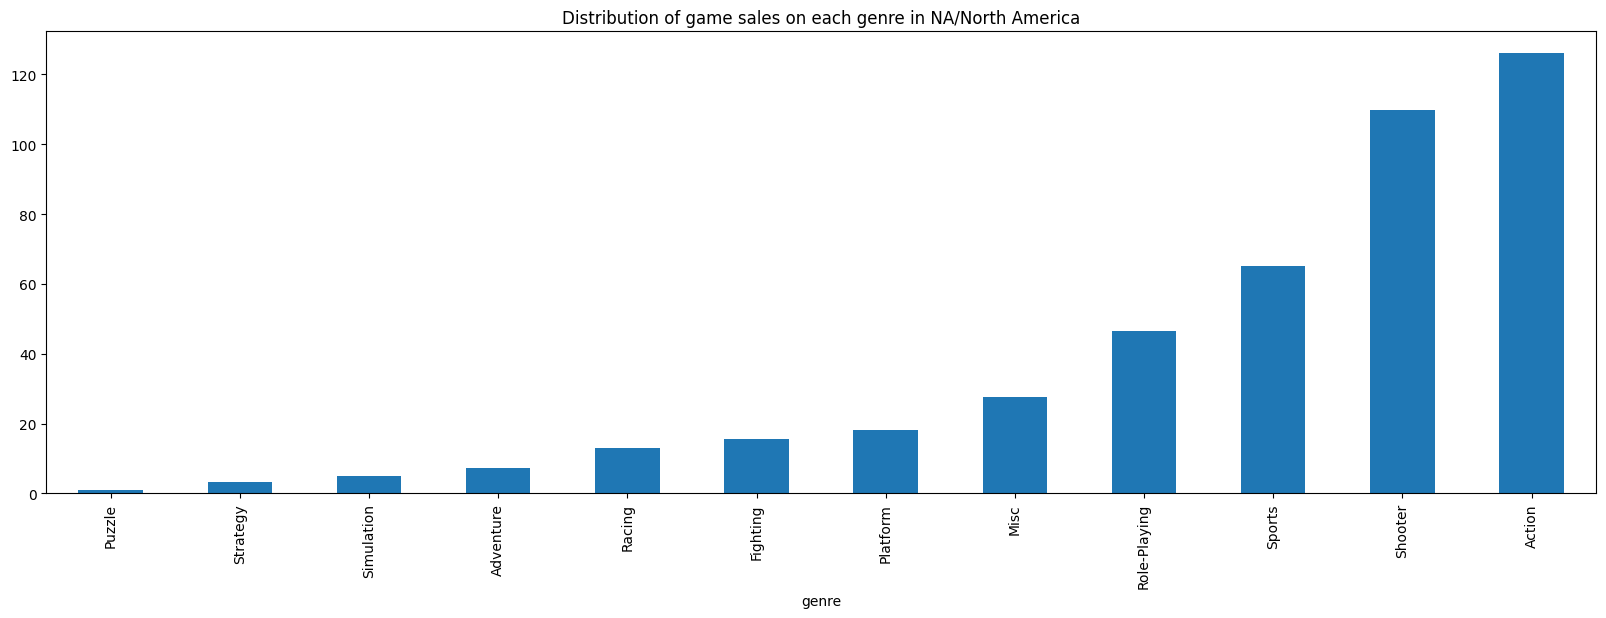

In [86]:
# visualizing the sales for each genre in NA region
na_genre = agg_selected_region_genre.sort_values(by='na_sales')
plt.figure(figsize=(20,6))
plt.title('Distribution of game sales on each genre in NA/North America')
na_genre['na_sales'].plot(kind='bar')
plt.show()

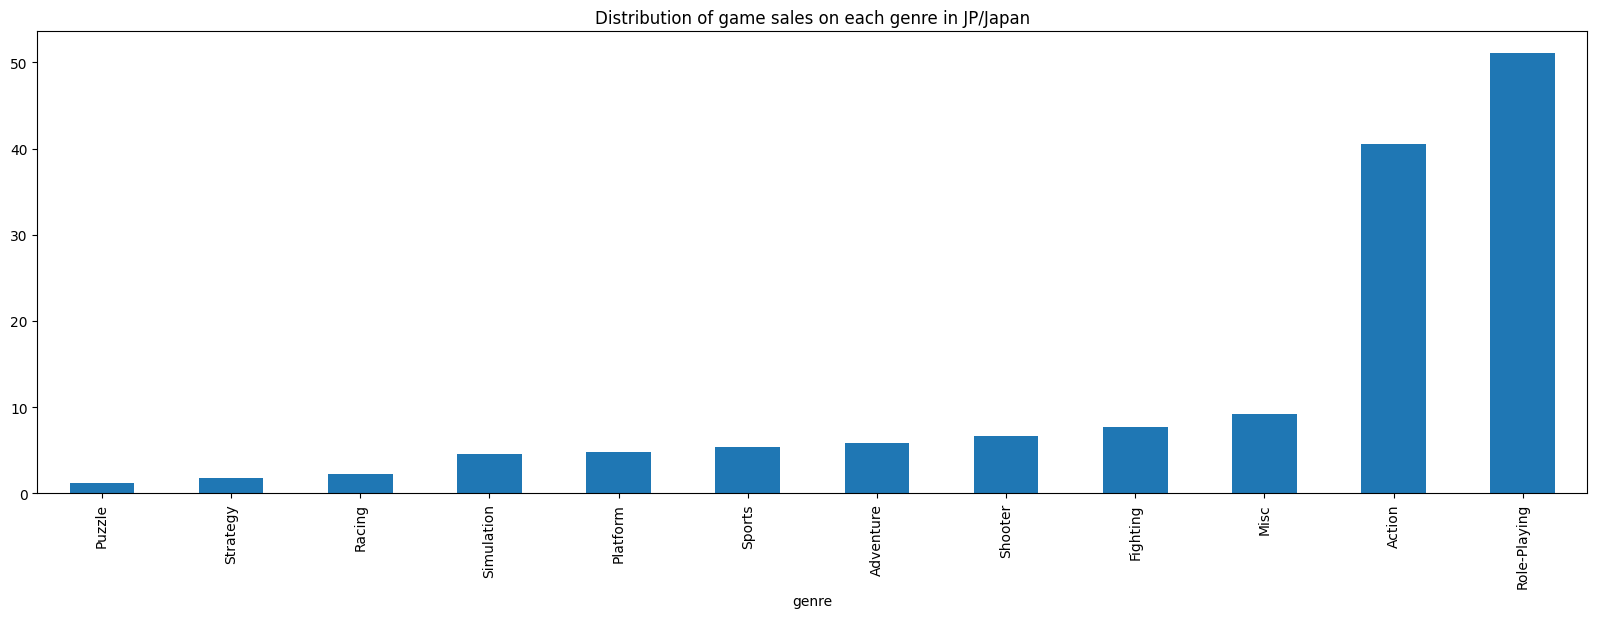

In [87]:
# visualizing the sales for each genre in JP region
jp_genre = agg_selected_region_genre.sort_values(by='jp_sales')
plt.figure(figsize=(20,6))
plt.title('Distribution of game sales on each genre in JP/Japan')
jp_genre['jp_sales'].plot(kind='bar')
plt.show()

**Findings**

1. The top 5 game genres in each region are as follows:
    - EU: Action, Shooter, Sports, Role-Playing, Racing
    - NA: Action, Shooter, Sports, Role-Playing, Misc
    - JP: Role-Playing, Action, Misc, Fighting, Shooter
2. The sales variations in each genre are as follows:
    - Puzzle genre game sales are not popular in any region, with sales around 1 million USD.
    - Strategy genre game sales are not popular in EU and NA, but relatively popular in Japan.
    - Adventure genre game sales are less popular in EU and NA, but quite high in Japan.
    - Simulation genre game sales are quite popular in EU, NA, and JP.
    - Platform genre game sales are quite popular in EU, NA, and JP (middle).
    - Action genre game sales are the highest in EU and NA, and second highest in Japan.
    - Shooter genre game sales rank second in EU and NA, but become the fifth highest in Japan.
    - Sports genre game sales rank second in EU and NA, but are moderately popular (middle) in Japan.
    - Role-Playing genre game sales are the highest in JP and fourth highest in EU and NA.
    - Misc genre game sales rank third in JP, fifth in NA, and sixth in EU.
    - Fighting genre game sales rank fourth in JP, but are not very popular in EU and NA (middle).
    - Racing genre game sales rank fifth in EU, but are not very popular in NA and JP (middle).

**Insight**

1. Based on the reference dataset, the genres Action, Shooter, Sports, and Role-Playing consistently occupy the top ranks in both EU and NA.
2. Game sales in the Action, Shooter, and Role-Playing genres consistently rank among the top 5 genres in all three regions.

**Recommendation**

1. By understanding the sales behavior in each genre, the focus can be shifted towards selling games of the most popular genres as the primary sales target.

#### 3.9.3 Does the ESRB rating influence sales in each region?

References for rating definitions: https://www.gamestop.com/ratings.html and https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board

Explanation for each rating is as follows:
- `E` : Everyone - Suitable for all ages
- `M` : Mature - Suitable for ages 17 and up
- `T` : Teen - Suitable for ages 13 and up
- `E10+` : Everyone 10+ - Suitable for ages 10 and up
- `K-A` : Kids to Adult - Suitable for all ages, same as 'E' rating
- `AO` : Adults Only - For adults aged 18 and up
- `EC` : Early Childhood - For preschool-aged users
- `RP` : Rating Pending - Not yet rated by ESRB. Appears only for promotional purposes and should be replaced with an actual rating once it is assigned.

In [88]:
# data aggregation of sales for each rating in NA, EU, JP regions
agg_selected_region_rating = pd.pivot_table(data=reference_df, index='rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').sort_values(by='jp_sales')
agg_selected_region_rating

,eu_sales,jp_sales,na_sales
rating,,,
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
E,83.36,15.14,79.05
T,41.95,20.59,49.79


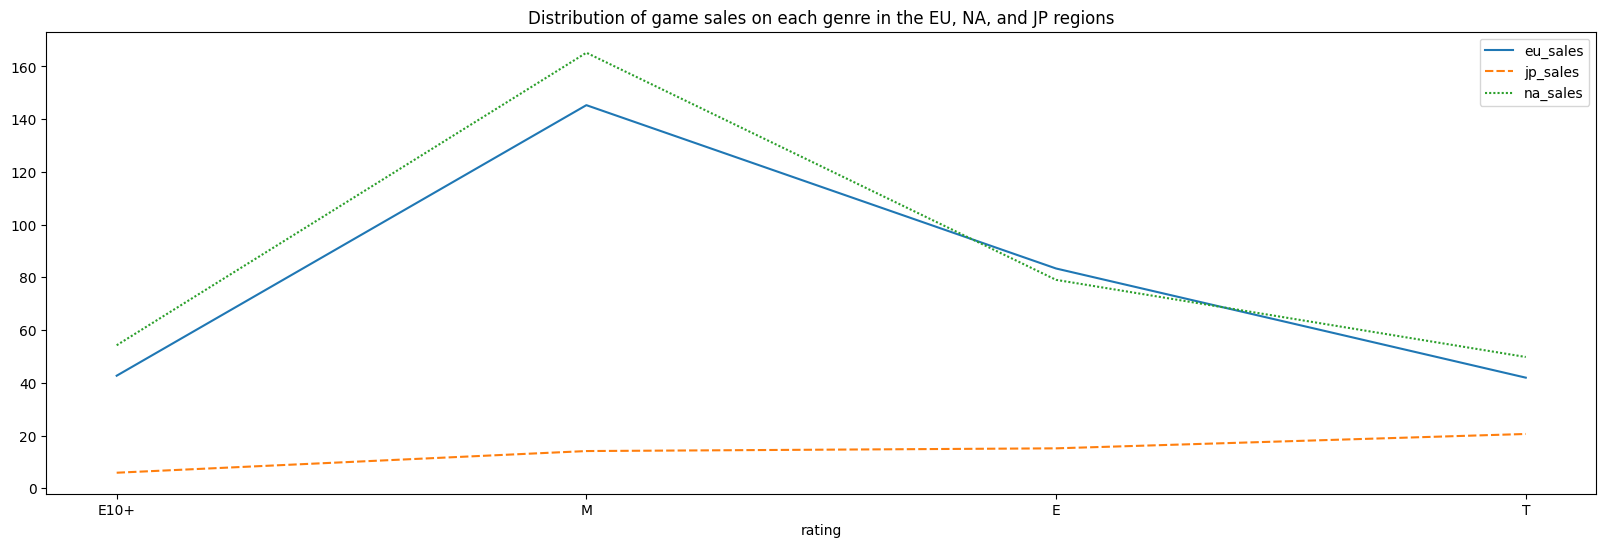

In [89]:
# visualizing the sales for each rating in NA, EU, JP regions
plt.figure(figsize=(20,6))
plt.title('Distribution of game sales on each genre in the EU, NA, and JP regions')
sns.lineplot(data=agg_selected_region_rating)
plt.show()

**Findings**

Based on the above graphs, the sales patterns of games in each rating category in the EU and NA regions are similar. Furthermore, in all three regions, game sales were observed only for the E10+, M, E, and T rating categories.

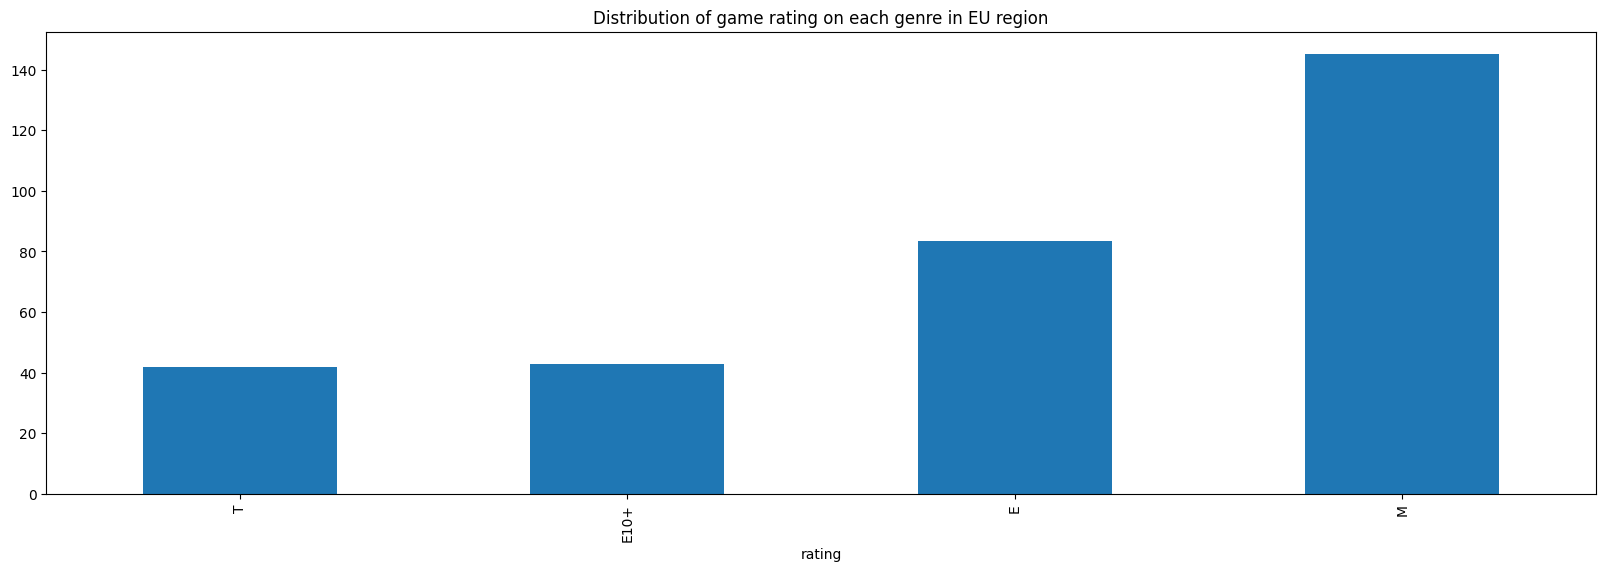

In [90]:
# visualizing the sales for each rating in EU region
eu_rating = agg_selected_region_rating.sort_values(by='eu_sales')
plt.figure(figsize=(20,6))
plt.title('Distribution of game rating on each genre in EU region')
eu_rating['eu_sales'].plot(kind='bar')
plt.show()

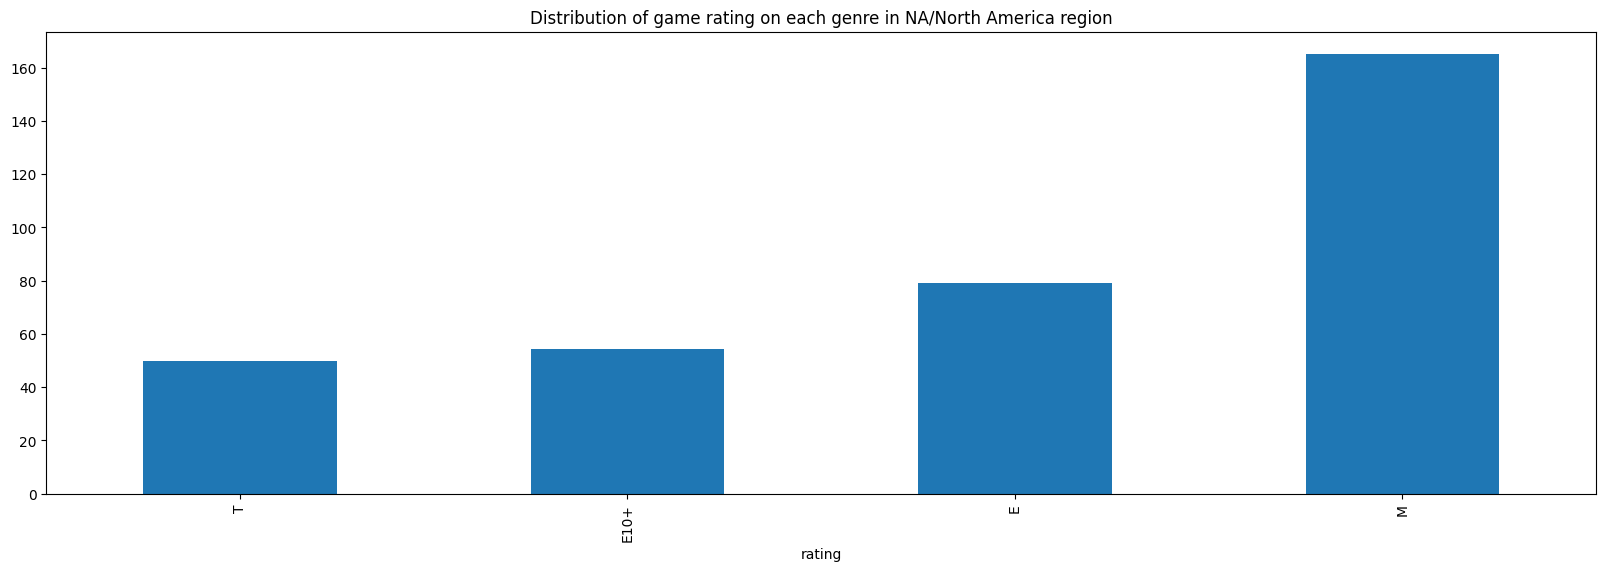

In [92]:
# visualizing the sales for each rating in NA region
na_rating = agg_selected_region_rating.sort_values(by='na_sales')
plt.figure(figsize=(20,6))
plt.title('Distribution of game rating on each genre in NA/North America region')
na_rating['na_sales'].plot(kind='bar')
plt.show()

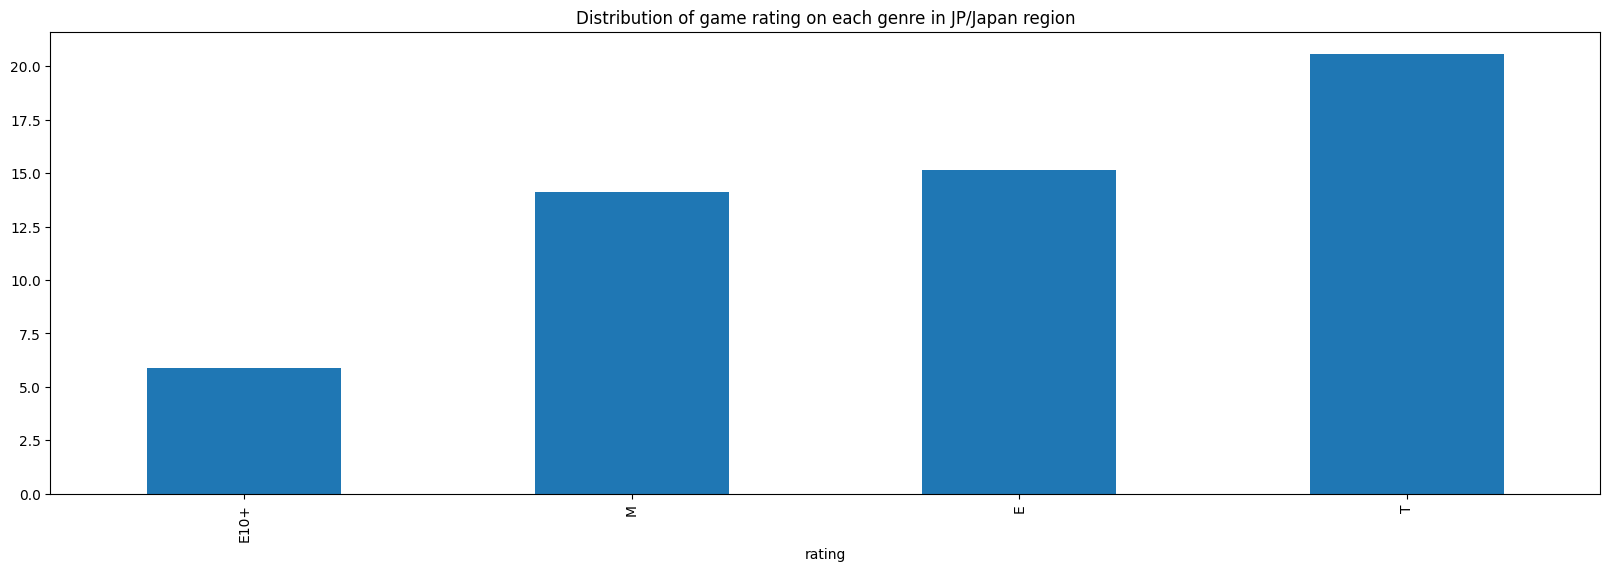

In [93]:
# visualizing the sales for each rating in JP region
jp_rating = agg_selected_region_rating.sort_values(by='jp_sales')
plt.figure(figsize=(20,6))
plt.title('Distribution of game rating on each genre in JP/Japan region')
jp_rating['jp_sales'].plot(kind='bar')
plt.show()

**Findings**

The detailed order of game sales based on ratings in the EU, NA, and JP regions can be seen below:
1. EU: M, E, E10+, T
2. NA: M, E, E10+, T
3. JP: T, E, M, E10+

Variations in sales for each rating:
1. Games with the M rating (Mature - 17 and up) have the highest sales in the EU and NA, and rank third in JP.
2. Games with the E rating (Everyone - All ages) rank second in the EU and NA, and second in JP as well.
3. Games with the E10+ rating (Everyone 10+ - Ages 10 and up) rank third in the EU and NA, and fourth in JP.
4. Games with the T rating (Teen - Ages 13 and up) rank last in the EU and NA, but have the highest sales in JP.

**Insight:**

ESRB ratings do influence sales in each region, as they reflect the market conditions in the three regions.

## 4. Hypotheses Testing <a id='hypotheses'></a>

[Back to Contents](#back)

**Hypothesis testing method is as follows:**

1. Determination of the null hypothesis and alternative hypothesis.

- The null hypothesis (H0) is a hypothesis that states that there is no significant relationship between the variables.

- The alternative hypothesis (H1) is a hypothesis that states that there is a significant effect or relationship between the variables.

2. Determine the error rate (alpha). For a sample of 500, a 5% error rate is usually sufficient. Alpha represents the level of significance at which chance can be accepted.

3. Choose the testing method (independent t-test, two-sided, one-sided).

4. Prepare the dataset for testing.

5. Input the dataset into the hypothesis testing method.

6. The p-value is obtained (the probability of the observed results being due to chance) and then compared with alpha.
    - If the p-value >= alpha: H0 is accepted. The probability is high, so the assumption is rejected.
    - If the p-value < alpha: H0 is rejected.

7. Draw conclusions based on the p-value and alpha.

### 4.1 Hypothesis 1: The mean user rating for the Xbox One and PC platforms is the same. <a id='mean_rating'></a>

H0: The mean user rating of the Xbox One platform is equal to the mean user rating of the PC platform.

H1: The mean user rating of the Xbox One platform is not equal to the mean user rating of the PC platform.

Alpha = 5%

Method = Independent T-test (Mean of 2 populations)

In [94]:
# sample distribution
reference_df['platform'].value_counts()

platform
PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: count, dtype: int64

In [95]:
# Preparing dataset
ref_df_xbox = reference_df.loc[reference_df['platform']=='XOne', 'user_score'].dropna()
ref_df_pc = reference_df.loc[reference_df['platform']=='PC', 'user_score'].dropna()

In [96]:
# check variant
np.var(ref_df_xbox), np.var(ref_df_pc)

(1.8965188383045526, 3.016306347554631)

In [97]:
ref_df_xbox

22      7.9
24      5.4
31      6.4
39      6.2
55      4.1
       ... 
2179    6.8
2194    6.0
2204    8.2
2208    6.6
2215    6.7
Name: user_score, Length: 182, dtype: float64

In [98]:
alpha = 0.05

In [100]:
# Levene Test
p_value_levene = st.levene(ref_df_xbox, ref_df_pc).pvalue
print('p value levene:', p_value_levene)
if p_value_levene < alpha:
    print('Reject H0: Variance of sample 1 is not equal to variance of sample 2')
else:
    print("Fail to reject H0: We don't have enough evidence to say that the difference between average user ratings of the XBox One and PC platform is statistically insignificant")

p value levene: 0.003897553110130418
Reject H0: Variance of sample 1 is not equal to variance of sample 2


In [101]:
# p-value
p_value = st.ttest_ind(ref_df_xbox, ref_df_pc, equal_var = False).pvalue
p_value

0.14759594013430463

In [102]:
# conclusion
print(f'P-value: {p_value * 100:0.2f}%')
if p_value < alpha:
    print('Reject H0: There are statistically significant differences between the average user rating of XBox and PC platforms')
else:
    print("Fail to reject H0: We don't have enough evidence to say that the difference between the average user rating of XBox and PC platforms is statistically insignificant")

P-value: 14.76%
Fail to reject H0: We don't have enough evidence to say that the difference between the average user rating of XBox and PC platforms is statistically insignificant


**Verdict**

The average user rating on the Xbox and PC platforms is not the same.

Meaning: Users on the Xbox and PC platforms have different impressions/rating values.

**Insight**

These two platforms provide different experiences. It might be worthwhile to delve deeper into the experiences for each platform.

### Hypothesis 2: The mean user rating for the Action and Sports genres is not the same. <a id='mean_genre'></a>

H0: The mean user rating of the Action genre is equal to the mean user rating of the Sports genre.

H1: The mean user rating of the Action genre is not equal to the mean user rating of the Sports genre.

Alpha = 5%

Method = Independent T-test (Mean of 2 populations)

In [103]:
# sample distribution
reference_df['genre'].value_counts()

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: count, dtype: int64

In [104]:
# Prepare dataset
ref_df_action = reference_df.loc[reference_df['genre']=='Action', 'user_score'].dropna()
ref_df_sports = reference_df.loc[reference_df['genre']=='Sports', 'user_score'].dropna()

In [105]:
# checking variant
np.var(ref_df_action), np.var(ref_df_sports)

(1.7648124186332366, 3.160733984375)

In [106]:
# Levene Test
p_value_levene = st.levene(ref_df_action, ref_df_sports).pvalue
print('p value levene:', p_value_levene)
if p_value_levene < alpha:
    print('Reject H0: Variance of sample 1 is not equal to variance of sample 2')
else:
    print("Fail to reject H0: We don't have enough evidence to say that the difference between average user ratings of the XBox One and PC platform is statistically insignificant")

p value levene: 4.2566688218274047e-07
Reject H0: Variance of sample 1 is not equal to variance of sample 2


In [107]:
# p-value
p_value = st.ttest_ind(ref_df_action, ref_df_sports, equal_var = False).pvalue
p_value

1.4460039700704315e-20

In [108]:
# conclusion
print(f'P-value: {p_value * 100:0.2f}%')
if p_value < alpha:
    print('Reject H0: There are statistically significant differences between the average user rating of Action and Sports genres')
else:
    print("Fail to reject H0: We don't have enough evidence to say that the difference between the average user rating of Action and Sports genres is statistically insignificant")

P-value: 0.00%
Reject H0: There are statistically significant differences between the average user rating of Action and Sports genres


**Verdict**

The average user rating for the Action and Sports genres is not the same.

Meaning: Users in the Action and Sports genres have different impressions/rating values.

**Insight**

These two genres provide different experiences. It might be worthwhile to delve deeper into the experiences when playing games in both of these genres.

# General Conclusion <a id='end'></a>

1. The profiles in the EU and NA regions show similarities in terms of platforms, genres, and ESRB ratings. Japan stands out as the region with the most distinct profile.
2. Strategies to increase profits can be based on the specific profiles of each region. For EU and NA regions, similar strategies could be employed with some modifications tailored to the unique aspects of each region, such as popular gaming platforms.
3. The correlation between variables in the reference dataset for the year 2017 is as follows:
    - Total sales and critic score have a moderate weak correlation (0.41). Higher total_sales are associated with higher critic_scores.
    - User_score and critic_score have a moderate high correlation (0.56). Higher user_scores correspond to higher critic_scores.
    - Total sales and user_score do not have a significant relationship (-0.034).
4. The concluded hypotheses are:
- The average user rating for the XBox and PC platforms is not the same.
- The average user rating for the Action and Sports genres is not the same.
5. The platform with potential for development in the year 2017 is the PS4.
6. The genre with potential for development in the year 2017 is the action.

[Back to Contents](#back)